Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
• Which variables are important to predict the price of variable?
• How do these variables describe the price of the house?
Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

In [1]:
# Importing requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step No. 1 Data Selection

In [2]:
#importing test dataset

df = pd.read_csv("Housing data one.csv")

In [3]:
#importing train dataset

df1 = pd.read_csv("Housing Train data.csv")

In [4]:
df #test dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [5]:
df.head()  #showing first five rows of test dataset.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [6]:
df.tail()  #showing last five rows of test dataset.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[5 rows x 80 columns]

In [7]:
df1 #train dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [8]:
df1.head()  #showing first five rows of train dataset.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [9]:
df1.tail()  #showing last five rows of train dataset.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[5 rows x 81 columns]

In [10]:
df.shape #Dimension of test dataset

(292, 80)

There are 292 rows and 80 columns present in dataset.

In [11]:
df1.shape #Dimension of train dataset.

(1168, 81)

There are 1168 rows and 81 columns present in dataset.

In [12]:
pd.set_option('display.max_rows',None)

pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5.

In [13]:
df.info()  #information about dataset like data type, Null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [14]:
df1.info()  #information about dataset like data type, Null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [15]:
df.dtypes   #datatype

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


The above dataset consist of integer values like Id, MSSubClass etc; object values like MSZoning, Street etc and float values like LotFrontage, MasVnrArea etc.   

In [16]:
df1.dtypes   #datatype

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [17]:
df.isnull().sum()  #to check for null value.

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu,GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageFinish, PoolQC, Fence, MiscFeature has null values present.                         

<AxesSubplot:>

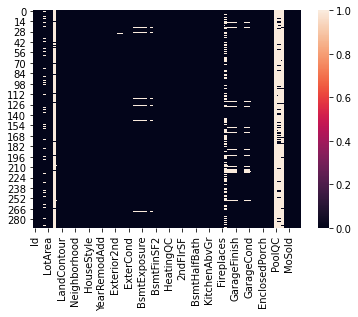

In [18]:
#Let's visualized null values.

sns.heatmap(df.isnull())

It is clear that dataset has null values because colour is not uniformly distributed.

In [19]:
df1.isnull().sum()  #to check for null value.

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<AxesSubplot:>

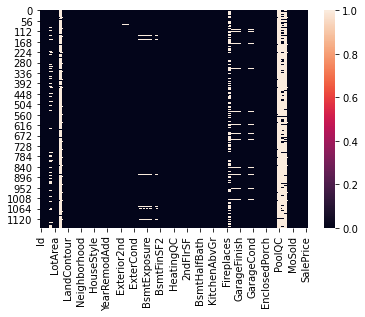

In [20]:
#Let's visualized null values.

sns.heatmap(df1.isnull())

# Step 2. Data Transformation

In [21]:
df['LotFrontage'].fillna(df['LotFrontage'].mode()[0],inplace=True)

In [22]:
df['Alley'].fillna(df['Alley'].mode()[0],inplace=True)

In [23]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [24]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0],inplace=True)

In [25]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [26]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)

In [27]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)

In [28]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)

In [29]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)

In [30]:
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

In [31]:
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [32]:
df['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)

In [33]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [34]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [35]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [42]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)

In [36]:
df['Fence'].fillna(df['Fence'].mode()[0],inplace=True)

In [37]:
df['MiscFeature'].fillna(df['MiscFeature'].mode()[0],inplace=True)

In [38]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [39]:
df = df.drop(columns=['PoolQC']) #removing unnecessary columns

In [43]:
df.isnull().sum()  #to check for null value.

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

<AxesSubplot:>

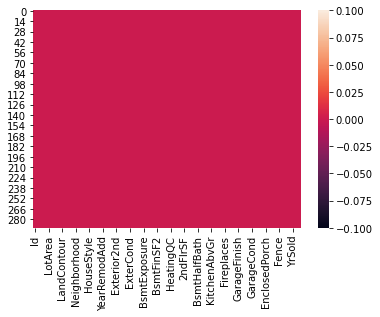

In [44]:
sns.heatmap(df.isnull())#Helps to viasalized it better for null values.

Now there are no null values present in dataset as red color uniformly distributed.

In [45]:
df1['LotFrontage'].fillna(df['LotFrontage'].mode()[0],inplace=True)

In [46]:
df1['Alley'].fillna(df['Alley'].mode()[0],inplace=True)

In [47]:
df1['MasVnrType'].fillna(df['MasVnrType'].mode()[0],inplace=True)

In [48]:
df1['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0],inplace=True)

In [49]:
df1['BsmtQual'].fillna(df['BsmtQual'].mode()[0],inplace=True)

In [50]:
df1['BsmtCond'].fillna(df['BsmtCond'].mode()[0],inplace=True)

In [51]:
df1['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0],inplace=True)

In [52]:
df1['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0],inplace=True)

In [53]:
df1['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0],inplace=True)

In [54]:
df1['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0],inplace=True)

In [55]:
df1['GarageType'].fillna(df['GarageType'].mode()[0],inplace=True)

In [56]:
df1['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)

In [57]:
df1['GarageFinish'].fillna(df['GarageFinish'].mode()[0],inplace=True)

In [58]:
df1['GarageQual'].fillna(df['GarageQual'].mode()[0],inplace=True)

In [59]:
df1['GarageCond'].fillna(df['GarageCond'].mode()[0],inplace=True)

In [60]:
df1['Fence'].fillna(df['Fence'].mode()[0],inplace=True)

In [61]:
df1['MiscFeature'].fillna(df['MiscFeature'].mode()[0],inplace=True)

In [62]:
df1 = df1.drop(columns=['PoolQC']) #removing unnecessary columns

In [63]:
df1.isnull().sum()  #to check for null value.

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

<AxesSubplot:>

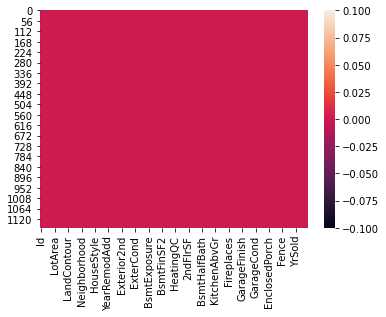

In [64]:
sns.heatmap(df1.isnull())#Helps to viasalized it better for null values.

In [65]:
from sklearn.preprocessing import LabelEncoder #importing required library.

In [66]:
lab_enc = LabelEncoder()  #storing LabelEncoder in lab_enc.

In [67]:
df1 = lab_enc.fit_transform(df['MSZoning'])  #Storing type dataset into df1
df2 = lab_enc.fit_transform(df['Street'])  #Storing type dataset into df2
df3 = lab_enc.fit_transform(df['Alley'])  #Storing type dataset into df3
df4 = lab_enc.fit_transform(df['LotShape'])  #Storing type dataset into df4
df5 = lab_enc.fit_transform(df['LandContour'])  #Storing type dataset into df5
df6 = lab_enc.fit_transform(df['Utilities'])  #Storing type dataset into df6
df7 = lab_enc.fit_transform(df['LotConfig'])  #Storing type dataset into df7
df8 = lab_enc.fit_transform(df['LandSlope'])  #Storing type dataset into df8
df9 = lab_enc.fit_transform(df['Neighborhood'])  #Storing type dataset into df9
df10 = lab_enc.fit_transform(df['Condition1'])  #Storing type dataset into df10
df11 = lab_enc.fit_transform(df['Condition2'])  #Storing type dataset into df11
df12 = lab_enc.fit_transform(df['BldgType'])  #Storing type dataset into df12
df13 = lab_enc.fit_transform(df['HouseStyle'])  #Storing type dataset into df13
df14 = lab_enc.fit_transform(df['RoofStyle'])  #Storing type dataset into df14
df15 = lab_enc.fit_transform(df['RoofMatl'])  #Storing type dataset into df15
df16 = lab_enc.fit_transform(df['Exterior1st'])  #Storing type dataset into df16
df17 = lab_enc.fit_transform(df['Exterior2nd'])  #Storing type dataset into df17
df18 = lab_enc.fit_transform(df['MasVnrType'])  #Storing type dataset into df18
df19 = lab_enc.fit_transform(df['ExterQual'])  #Storing type dataset into df19
df20 = lab_enc.fit_transform(df['ExterCond'])  #Storing type dataset into df20
df21 = lab_enc.fit_transform(df['Foundation'])  #Storing type dataset into df21
df22 = lab_enc.fit_transform(df['BsmtQual'])  #Storing type dataset into df22
df23 = lab_enc.fit_transform(df['BsmtCond'])  #Storing type dataset into df23
df24 = lab_enc.fit_transform(df['BsmtExposure'])  #Storing type dataset into df24
df25 = lab_enc.fit_transform(df['BsmtFinType1'])  #Storing type dataset into df25
df26 = lab_enc.fit_transform(df['BsmtFinType2'])  #Storing type dataset into df26
df27 = lab_enc.fit_transform(df['Heating'])  #Storing type dataset into df27
df28 = lab_enc.fit_transform(df['HeatingQC'])  #Storing type dataset into df28
df29 = lab_enc.fit_transform(df['CentralAir'])  #Storing type dataset into df29
df30 = lab_enc.fit_transform(df['Electrical'])  #Storing type dataset into df30
df31 = lab_enc.fit_transform(df['KitchenQual'])  #Storing type dataset into df31
df32 = lab_enc.fit_transform(df['Functional'])  #Storing type dataset into df32
df33 = lab_enc.fit_transform(df['FireplaceQu'])  #Storing type dataset into df33
df34 = lab_enc.fit_transform(df['GarageType'])  #Storing type dataset into df34
df35 = lab_enc.fit_transform(df['GarageFinish'])  #Storing type dataset into df35
df36 = lab_enc.fit_transform(df['GarageQual'])  #Storing type dataset into df36
df37 = lab_enc.fit_transform(df['GarageCond'])  #Storing type dataset into df37
df38 = lab_enc.fit_transform(df['PavedDrive'])  #Storing type dataset into df38
df39 = lab_enc.fit_transform(df['Fence'])  #Storing type dataset into df39
df40 = lab_enc.fit_transform(df['MiscFeature'])  #Storing type dataset into df40
df41 = lab_enc.fit_transform(df['SaleType'])  #Storing type dataset into df41
df42 = lab_enc.fit_transform(df['SaleCondition'])  #Storing type dataset into df42

In [68]:
pd.Series(df1)  #Converting dataset

0      2
1      2
2      2
3      2
4      2
5      3
6      3
7      2
8      2
9      3
10     3
11     2
12     2
13     2
14     2
15     2
16     2
17     2
18     1
19     2
20     3
21     2
22     2
23     3
24     2
25     2
26     2
27     2
28     2
29     3
30     3
31     2
32     2
33     2
34     2
35     2
36     2
37     3
38     2
39     2
40     3
41     2
42     2
43     1
44     2
45     3
46     2
47     3
48     2
49     2
50     2
51     2
52     3
53     2
54     2
55     2
56     3
57     2
58     3
59     2
60     3
61     2
62     2
63     3
64     3
65     3
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     3
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
1

In [69]:
pd.Series(df2)  #Converting dataset

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     0
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [70]:
pd.Series(df3)  #Converting dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     1
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [71]:
pd.Series(df4)  #Converting dataset

0      0
1      0
2      3
3      3
4      0
5      3
6      3
7      3
8      3
9      3
10     0
11     3
12     3
13     3
14     3
15     3
16     0
17     3
18     3
19     0
20     3
21     3
22     0
23     3
24     3
25     0
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     0
34     3
35     0
36     0
37     3
38     0
39     3
40     3
41     3
42     0
43     3
44     0
45     3
46     3
47     2
48     0
49     0
50     3
51     0
52     3
53     3
54     0
55     0
56     3
57     3
58     1
59     0
60     3
61     0
62     3
63     3
64     3
65     3
66     3
67     3
68     0
69     3
70     3
71     0
72     3
73     3
74     3
75     0
76     3
77     3
78     0
79     0
80     0
81     3
82     0
83     3
84     3
85     3
86     3
87     0
88     3
89     0
90     3
91     3
92     3
93     3
94     0
95     3
96     0
97     0
98     3
99     0
100    3
101    0
102    0
103    3
104    3
105    3
106    0
107    3
108    0
109    3
110    0
1

In [72]:
pd.Series(df5)  #Converting dataset

0      1
1      3
2      3
3      0
4      3
5      3
6      3
7      3
8      2
9      3
10     3
11     3
12     1
13     3
14     3
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     0
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     3
34     3
35     3
36     3
37     3
38     3
39     3
40     3
41     3
42     3
43     3
44     3
45     3
46     3
47     0
48     3
49     3
50     3
51     3
52     3
53     3
54     3
55     3
56     3
57     3
58     0
59     3
60     3
61     3
62     3
63     3
64     3
65     3
66     3
67     3
68     3
69     3
70     3
71     3
72     0
73     3
74     3
75     3
76     3
77     3
78     3
79     3
80     3
81     3
82     3
83     3
84     3
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     3
93     3
94     3
95     3
96     1
97     3
98     3
99     3
100    3
101    3
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [73]:
pd.Series(df6)  #Converting dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [74]:
pd.Series(df7)  #Converting dataset

0      0
1      1
2      4
3      4
4      1
5      4
6      4
7      4
8      4
9      2
10     4
11     4
12     4
13     4
14     0
15     4
16     0
17     0
18     3
19     4
20     4
21     4
22     0
23     4
24     4
25     1
26     4
27     4
28     0
29     4
30     4
31     4
32     4
33     0
34     4
35     4
36     4
37     4
38     1
39     4
40     4
41     4
42     0
43     4
44     1
45     4
46     4
47     4
48     4
49     4
50     4
51     4
52     4
53     4
54     4
55     1
56     4
57     4
58     0
59     4
60     4
61     1
62     4
63     4
64     3
65     4
66     4
67     0
68     2
69     4
70     4
71     1
72     4
73     0
74     4
75     4
76     4
77     4
78     1
79     4
80     4
81     4
82     4
83     4
84     2
85     0
86     4
87     1
88     4
89     4
90     4
91     4
92     4
93     4
94     4
95     2
96     4
97     4
98     4
99     0
100    4
101    4
102    4
103    4
104    4
105    4
106    1
107    0
108    4
109    4
110    0
1

In [75]:
pd.Series(df8)  #Converting dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      0
10     0
11     0
12     1
13     1
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     1
52     0
53     0
54     0
55     0
56     0
57     0
58     1
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [76]:
pd.Series(df9)  #Converting dataset

0      21
1      21
2       4
3       5
4      20
5       9
6       6
7      15
8      19
9      10
10      2
11     11
12     10
13     22
14     15
15      6
16     10
17     11
18     20
19     21
20     16
21     18
22     11
23      8
24     17
25     10
26      7
27     11
28     13
29      8
30     18
31     19
32      4
33     11
34     16
35      7
36     19
37      1
38     13
39     12
40     16
41     14
42      7
43     20
44      4
45      2
46     11
47     16
48     15
49      6
50      6
51     10
52      8
53      5
54     14
55     18
56      2
57      7
58      8
59     15
60      9
61     13
62     18
63      4
64     15
65      9
66     19
67     13
68     18
69     11
70     14
71     22
72      2
73     11
74      6
75      7
76     22
77      0
78     10
79     18
80      7
81     11
82     11
83     11
84     23
85     17
86     16
87     14
88     13
89      7
90     20
91     19
92      2
93     19
94     13
95     10
96     22
97      7
98      4
99      4


In [77]:
pd.Series(df10)  #Converting dataset

0      2
1      2
2      2
3      2
4      1
5      2
6      2
7      2
8      2
9      2
10     1
11     2
12     0
13     2
14     2
15     2
16     2
17     1
18     2
19     2
20     0
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
30     5
31     2
32     2
33     2
34     2
35     2
36     2
37     2
38     2
39     2
40     2
41     2
42     2
43     2
44     2
45     2
46     2
47     0
48     2
49     2
50     2
51     2
52     2
53     2
54     2
55     2
56     2
57     2
58     7
59     2
60     2
61     4
62     1
63     2
64     2
65     2
66     5
67     2
68     1
69     2
70     2
71     2
72     2
73     1
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     1
85     2
86     2
87     2
88     6
89     2
90     2
91     2
92     6
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    3
110    2
1

In [78]:
pd.Series(df11)  #Converting dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [79]:
pd.Series(df12)  #Converting dataset

0      0
1      4
2      0
3      0
4      0
5      3
6      4
7      0
8      0
9      4
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     0
22     0
23     1
24     0
25     0
26     0
27     0
28     0
29     0
30     2
31     0
32     0
33     0
34     0
35     0
36     0
37     3
38     0
39     3
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     3
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     2
59     0
60     3
61     0
62     0
63     4
64     4
65     4
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     2
74     0
75     0
76     0
77     4
78     0
79     0
80     0
81     0
82     2
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     4
92     0
93     4
94     0
95     3
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    2
106    0
107    2
108    0
109    0
110    0
1

In [80]:
pd.Series(df13)  #Converting dataset

0      2
1      2
2      2
3      5
4      5
5      6
6      7
7      2
8      7
9      2
10     2
11     2
12     2
13     2
14     2
15     0
16     2
17     2
18     5
19     5
20     5
21     2
22     2
23     5
24     2
25     2
26     5
27     2
28     5
29     2
30     0
31     2
32     2
33     2
34     2
35     7
36     5
37     5
38     5
39     5
40     2
41     5
42     5
43     2
44     6
45     0
46     2
47     2
48     2
49     2
50     0
51     2
52     0
53     1
54     5
55     7
56     0
57     5
58     2
59     2
60     7
61     5
62     2
63     2
64     2
65     5
66     2
67     2
68     2
69     2
70     0
71     7
72     0
73     5
74     7
75     5
76     5
77     2
78     2
79     2
80     5
81     0
82     2
83     2
84     7
85     3
86     2
87     0
88     5
89     5
90     2
91     2
92     5
93     2
94     5
95     2
96     2
97     7
98     5
99     2
100    5
101    2
102    2
103    7
104    5
105    6
106    0
107    2
108    5
109    5
110    2
1

In [81]:
pd.Series(df14)  #Converting dataset

0      3
1      1
2      3
3      1
4      1
5      1
6      1
7      3
8      1
9      3
10     1
11     3
12     3
13     3
14     3
15     1
16     1
17     1
18     3
19     1
20     3
21     1
22     1
23     3
24     1
25     1
26     1
27     1
28     1
29     3
30     1
31     1
32     3
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     3
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     3
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     3
71     1
72     2
73     1
74     3
75     1
76     3
77     1
78     3
79     3
80     1
81     1
82     1
83     3
84     3
85     1
86     1
87     3
88     1
89     1
90     3
91     1
92     1
93     1
94     1
95     3
96     3
97     1
98     3
99     3
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    4
110    1
1

In [82]:
pd.Series(df15)  #Converting dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    2
110    0
1

In [83]:
pd.Series(df16)  #Converting dataset

0       9
1       5
2       9
3       6
4       9
5       4
6       9
7       9
8      10
9       9
10      6
11      5
12      5
13      6
14      9
15      6
16      5
17      9
18      6
19      5
20      9
21      7
22      6
23      9
24     10
25      5
26      9
27      5
28      5
29     10
30      9
31      9
32      9
33      5
34      9
35      9
36      5
37      4
38      5
39      7
40      9
41      9
42      9
43      9
44      9
45     10
46      2
47     10
48      9
49      4
50     10
51      7
52      0
53     10
54      9
55      9
56      6
57      9
58     10
59      9
60      4
61      7
62      5
63      9
64      9
65      4
66      9
67     10
68      9
69      5
70      5
71      5
72     10
73      6
74      6
75      9
76      9
77      9
78      4
79      7
80      9
81      9
82      5
83     10
84      7
85     10
86     10
87      9
88      6
89      9
90      9
91      7
92     10
93      7
94      7
95      9
96      9
97      5
98      9
99      6


In [84]:
pd.Series(df17)  #Converting dataset

0      11
1       5
2      11
3       7
4      11
5       4
6      11
7      11
8      12
9      11
10      7
11      5
12      5
13      7
14     11
15      7
16      8
17     11
18      7
19      5
20     11
21      8
22      7
23     13
24     12
25      8
26     11
27      5
28      5
29     12
30     11
31     11
32     11
33      5
34     11
35     11
36      5
37      4
38      8
39      1
40     11
41     11
42     11
43     11
44     11
45     12
46     12
47     12
48     11
49      4
50     12
51      6
52      0
53     12
54     11
55     11
56      7
57     11
58     12
59     11
60      4
61      8
62      5
63     11
64     11
65      4
66     11
67     12
68     11
69      8
70      5
71      5
72     12
73      7
74      7
75     11
76     11
77     11
78      4
79      8
80     11
81     12
82      5
83     12
84      8
85      8
86     12
87     11
88      7
89     11
90     11
91      8
92     12
93      8
94      8
95     11
96     11
97      5
98     11
99      7


In [85]:
pd.Series(df18)  #Converting dataset

0      3
1      2
2      2
3      2
4      3
5      2
6      1
7      3
8      1
9      1
10     2
11     2
12     2
13     1
14     1
15     2
16     2
17     2
18     1
19     2
20     2
21     1
22     1
23     2
24     2
25     2
26     2
27     1
28     1
29     2
30     2
31     2
32     2
33     1
34     2
35     2
36     1
37     1
38     2
39     2
40     2
41     1
42     2
43     2
44     2
45     2
46     2
47     2
48     3
49     3
50     2
51     2
52     2
53     2
54     1
55     2
56     2
57     2
58     2
59     3
60     2
61     1
62     2
63     1
64     3
65     2
66     2
67     2
68     2
69     1
70     1
71     1
72     2
73     1
74     1
75     2
76     3
77     1
78     1
79     1
80     2
81     2
82     1
83     1
84     1
85     2
86     2
87     1
88     2
89     2
90     3
91     2
92     2
93     2
94     1
95     1
96     1
97     1
98     3
99     2
100    1
101    1
102    2
103    2
104    2
105    2
106    2
107    1
108    1
109    2
110    2
1

In [86]:
pd.Series(df19)  #Converting dataset

0      2
1      2
2      2
3      3
4      2
5      3
6      3
7      2
8      2
9      3
10     3
11     3
12     3
13     3
14     2
15     3
16     3
17     3
18     2
19     2
20     3
21     3
22     3
23     1
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     2
32     2
33     3
34     2
35     3
36     2
37     3
38     3
39     3
40     3
41     2
42     2
43     2
44     2
45     3
46     3
47     3
48     2
49     0
50     3
51     3
52     3
53     3
54     2
55     3
56     3
57     2
58     1
59     2
60     3
61     3
62     3
63     2
64     2
65     3
66     3
67     2
68     3
69     3
70     2
71     3
72     3
73     3
74     3
75     2
76     2
77     2
78     2
79     3
80     2
81     3
82     3
83     3
84     2
85     3
86     3
87     2
88     3
89     3
90     2
91     3
92     3
93     3
94     3
95     3
96     2
97     3
98     2
99     3
100    2
101    3
102    3
103    3
104    3
105    3
106    2
107    3
108    3
109    3
110    2
1

In [87]:
pd.Series(df20)  #Converting dataset

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     3
13     3
14     3
15     3
16     3
17     3
18     3
19     2
20     2
21     3
22     3
23     1
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     3
34     3
35     3
36     2
37     3
38     3
39     3
40     3
41     3
42     3
43     3
44     3
45     3
46     3
47     3
48     3
49     3
50     3
51     3
52     3
53     3
54     3
55     2
56     3
57     3
58     3
59     3
60     3
61     2
62     3
63     3
64     3
65     3
66     3
67     3
68     3
69     3
70     3
71     3
72     3
73     3
74     3
75     3
76     3
77     3
78     3
79     3
80     3
81     3
82     3
83     3
84     2
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     3
93     3
94     3
95     3
96     3
97     3
98     3
99     2
100    3
101    2
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    2
1

In [88]:
pd.Series(df21)  #Converting dataset

0      2
1      1
2      2
3      1
4      2
5      1
6      2
7      2
8      2
9      2
10     0
11     1
12     1
13     1
14     2
15     0
16     1
17     1
18     2
19     2
20     2
21     1
22     1
23     3
24     0
25     1
26     2
27     2
28     1
29     0
30     3
31     2
32     2
33     1
34     0
35     2
36     2
37     1
38     1
39     1
40     1
41     2
42     2
43     2
44     2
45     0
46     1
47     0
48     2
49     2
50     1
51     2
52     2
53     0
54     2
55     1
56     2
57     2
58     1
59     2
60     1
61     1
62     1
63     2
64     2
65     1
66     2
67     1
68     1
69     1
70     2
71     1
72     0
73     1
74     1
75     2
76     2
77     2
78     2
79     1
80     2
81     1
82     1
83     1
84     1
85     0
86     0
87     2
88     1
89     2
90     2
91     1
92     0
93     1
94     1
95     2
96     2
97     2
98     2
99     1
100    2
101    2
102    1
103    2
104    2
105    1
106    2
107    1
108    2
109    1
110    1
1

In [89]:
pd.Series(df22)  #Converting dataset

0      0
1      2
2      2
3      3
4      2
5      2
6      2
7      0
8      2
9      0
10     3
11     3
12     3
13     3
14     2
15     3
16     3
17     3
18     2
19     2
20     3
21     3
22     3
23     3
24     2
25     3
26     2
27     3
28     3
29     3
30     3
31     2
32     2
33     3
34     3
35     2
36     2
37     3
38     3
39     3
40     3
41     2
42     2
43     2
44     2
45     3
46     3
47     1
48     2
49     0
50     3
51     3
52     3
53     3
54     2
55     3
56     3
57     2
58     2
59     2
60     2
61     3
62     3
63     2
64     2
65     3
66     3
67     2
68     3
69     3
70     2
71     3
72     3
73     3
74     3
75     2
76     2
77     2
78     2
79     3
80     0
81     3
82     3
83     3
84     3
85     3
86     3
87     2
88     3
89     2
90     2
91     2
92     3
93     2
94     3
95     0
96     2
97     2
98     0
99     3
100    2
101    1
102    3
103    2
104    3
105    3
106    0
107    3
108    2
109    2
110    2
1

In [90]:
pd.Series(df23)  #Converting dataset

0      2
1      2
2      2
3      2
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     1
16     2
17     2
18     2
19     1
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     0
30     2
31     2
32     2
33     2
34     2
35     2
36     1
37     2
38     1
39     2
40     2
41     2
42     2
43     2
44     2
45     0
46     2
47     2
48     2
49     2
50     2
51     2
52     2
53     2
54     2
55     1
56     2
57     2
58     2
59     2
60     2
61     2
62     2
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     1
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
1

In [91]:
pd.Series(df24)  #Converting dataset

0      1
1      0
2      0
3      3
4      2
5      0
6      1
7      1
8      1
9      3
10     3
11     3
12     3
13     1
14     0
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     2
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     3
34     3
35     3
36     3
37     3
38     3
39     3
40     3
41     3
42     1
43     3
44     0
45     3
46     3
47     3
48     3
49     3
50     3
51     1
52     3
53     3
54     3
55     0
56     3
57     3
58     1
59     3
60     1
61     3
62     3
63     0
64     0
65     3
66     3
67     2
68     3
69     3
70     3
71     3
72     3
73     3
74     0
75     3
76     1
77     3
78     3
79     3
80     0
81     3
82     3
83     3
84     3
85     3
86     3
87     0
88     3
89     3
90     0
91     3
92     3
93     3
94     3
95     3
96     0
97     3
98     1
99     2
100    3
101    2
102    3
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    1
1

In [92]:
pd.Series(df25)  #Converting dataset

0      2
1      2
2      5
3      4
4      5
5      1
6      2
7      2
8      2
9      2
10     5
11     0
12     5
13     4
14     5
15     4
16     0
17     1
18     2
19     2
20     0
21     5
22     1
23     2
24     4
25     0
26     5
27     3
28     0
29     5
30     2
31     2
32     2
33     4
34     5
35     5
36     2
37     0
38     1
39     0
40     0
41     2
42     5
43     2
44     2
45     3
46     3
47     5
48     2
49     2
50     3
51     0
52     5
53     5
54     5
55     2
56     5
57     5
58     3
59     5
60     2
61     0
62     1
63     2
64     2
65     1
66     2
67     0
68     1
69     4
70     2
71     2
72     5
73     4
74     0
75     2
76     2
77     2
78     2
79     1
80     5
81     4
82     3
83     4
84     5
85     2
86     5
87     2
88     4
89     5
90     5
91     1
92     5
93     5
94     3
95     2
96     2
97     5
98     2
99     4
100    5
101    5
102    5
103    5
104    5
105    2
106    2
107    5
108    5
109    5
110    0
1

In [93]:
pd.Series(df26)  #Converting dataset

0      5
1      5
2      5
3      5
4      5
5      2
6      5
7      5
8      5
9      5
10     5
11     4
12     5
13     5
14     5
15     1
16     5
17     3
18     5
19     4
20     5
21     5
22     5
23     5
24     5
25     5
26     5
27     5
28     5
29     5
30     5
31     5
32     5
33     5
34     5
35     5
36     5
37     5
38     5
39     5
40     1
41     5
42     5
43     5
44     5
45     5
46     5
47     5
48     5
49     5
50     1
51     5
52     5
53     5
54     5
55     5
56     5
57     5
58     2
59     5
60     5
61     5
62     3
63     5
64     5
65     3
66     5
67     5
68     5
69     1
70     5
71     4
72     5
73     5
74     5
75     5
76     5
77     5
78     5
79     5
80     5
81     1
82     5
83     5
84     5
85     5
86     5
87     5
88     5
89     5
90     5
91     1
92     5
93     5
94     5
95     5
96     5
97     5
98     5
99     5
100    5
101    5
102    5
103    5
104    5
105    5
106    5
107    5
108    5
109    5
110    5
1

In [94]:
pd.Series(df27)  #Converting dataset

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     2
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [95]:
pd.Series(df28)  #Converting dataset

0      0
1      2
2      0
3      0
4      0
5      2
6      2
7      0
8      2
9      0
10     1
11     3
12     0
13     2
14     2
15     0
16     0
17     3
18     0
19     2
20     0
21     0
22     3
23     1
24     3
25     3
26     0
27     2
28     2
29     1
30     3
31     0
32     0
33     3
34     0
35     0
36     0
37     3
38     3
39     3
40     0
41     2
42     0
43     0
44     0
45     3
46     3
47     2
48     0
49     0
50     0
51     3
52     2
53     1
54     0
55     0
56     3
57     0
58     3
59     0
60     3
61     0
62     0
63     0
64     0
65     3
66     0
67     0
68     0
69     3
70     0
71     2
72     2
73     3
74     0
75     0
76     0
77     0
78     0
79     3
80     0
81     2
82     3
83     2
84     0
85     0
86     3
87     0
88     0
89     0
90     0
91     3
92     0
93     3
94     3
95     0
96     0
97     2
98     0
99     0
100    0
101    2
102    0
103    2
104    2
105    2
106    0
107    3
108    0
109    3
110    3
1

In [96]:
pd.Series(df29)  #Converting dataset

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     0
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     0
24     0
25     1
26     1
27     1
28     1
29     0
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     0
48     1
49     1
50     1
51     1
52     1
53     0
54     1
55     1
56     1
57     1
58     0
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [97]:
pd.Series(df30)  #Converting dataset

0      3
1      3
2      3
3      3
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     3
12     0
13     3
14     3
15     3
16     3
17     3
18     3
19     3
20     3
21     3
22     3
23     3
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     3
32     3
33     0
34     3
35     3
36     3
37     3
38     3
39     3
40     3
41     3
42     3
43     3
44     3
45     0
46     0
47     2
48     3
49     3
50     3
51     3
52     3
53     3
54     3
55     3
56     3
57     3
58     3
59     3
60     3
61     3
62     3
63     3
64     3
65     3
66     3
67     3
68     3
69     3
70     3
71     0
72     3
73     0
74     3
75     3
76     3
77     3
78     3
79     3
80     3
81     0
82     3
83     3
84     3
85     3
86     3
87     3
88     3
89     3
90     3
91     3
92     0
93     3
94     3
95     3
96     3
97     3
98     3
99     3
100    3
101    3
102    0
103    3
104    3
105    3
106    3
107    3
108    3
109    3
110    3
1

In [98]:
pd.Series(df31)  #Converting dataset

0      2
1      2
2      0
3      1
4      2
5      3
6      3
7      2
8      2
9      3
10     1
11     3
12     3
13     3
14     2
15     3
16     3
17     3
18     2
19     2
20     3
21     3
22     3
23     1
24     3
25     3
26     3
27     3
28     3
29     3
30     3
31     2
32     2
33     3
34     2
35     3
36     2
37     3
38     3
39     3
40     3
41     2
42     2
43     2
44     3
45     3
46     3
47     3
48     2
49     0
50     3
51     2
52     3
53     3
54     2
55     3
56     3
57     2
58     3
59     2
60     3
61     2
62     3
63     2
64     2
65     3
66     2
67     2
68     2
69     3
70     2
71     2
72     2
73     3
74     3
75     2
76     2
77     2
78     2
79     3
80     2
81     3
82     3
83     3
84     3
85     3
86     3
87     2
88     3
89     3
90     2
91     3
92     3
93     3
94     2
95     3
96     0
97     2
98     2
99     3
100    2
101    3
102    2
103    2
104    2
105    3
106    2
107    3
108    3
109    3
110    2
1

In [99]:
pd.Series(df32)  #Converting dataset

0      5
1      5
2      5
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
11     2
12     5
13     5
14     5
15     5
16     5
17     5
18     5
19     5
20     5
21     5
22     5
23     4
24     5
25     5
26     5
27     5
28     5
29     5
30     5
31     5
32     5
33     5
34     5
35     5
36     5
37     5
38     5
39     5
40     5
41     5
42     5
43     5
44     5
45     5
46     5
47     5
48     5
49     5
50     3
51     5
52     5
53     5
54     5
55     5
56     5
57     5
58     5
59     5
60     5
61     5
62     5
63     5
64     5
65     5
66     5
67     5
68     5
69     5
70     5
71     5
72     5
73     5
74     5
75     5
76     5
77     5
78     5
79     5
80     5
81     2
82     5
83     5
84     5
85     5
86     5
87     5
88     5
89     5
90     5
91     5
92     5
93     5
94     5
95     5
96     5
97     5
98     5
99     5
100    5
101    5
102    5
103    5
104    5
105    5
106    5
107    5
108    5
109    5
110    5
1

In [100]:
pd.Series(df33)  #Converting dataset

0      2
1      0
2      4
3      2
4      2
5      2
6      2
7      2
8      4
9      2
10     2
11     4
12     2
13     4
14     2
15     2
16     2
17     2
18     2
19     4
20     2
21     4
22     1
23     2
24     2
25     2
26     4
27     2
28     4
29     2
30     2
31     2
32     2
33     2
34     2
35     4
36     2
37     2
38     4
39     4
40     2
41     4
42     2
43     2
44     2
45     2
46     2
47     2
48     2
49     2
50     2
51     4
52     2
53     2
54     4
55     2
56     2
57     2
58     2
59     2
60     2
61     4
62     4
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     4
71     2
72     2
73     2
74     1
75     4
76     2
77     4
78     2
79     1
80     2
81     2
82     2
83     4
84     4
85     4
86     2
87     0
88     2
89     4
90     2
91     4
92     2
93     4
94     4
95     2
96     2
97     4
98     4
99     2
100    2
101    2
102    2
103    2
104    4
105    2
106    0
107    2
108    4
109    2
110    1
1

In [101]:
pd.Series(df34)  #Converting dataset

0      1
1      1
2      1
3      1
4      3
5      1
6      2
7      1
8      1
9      1
10     5
11     5
12     1
13     0
14     1
15     5
16     1
17     5
18     5
19     1
20     5
21     1
22     1
23     1
24     5
25     1
26     1
27     1
28     1
29     5
30     1
31     1
32     1
33     1
34     5
35     3
36     1
37     5
38     1
39     1
40     5
41     1
42     3
43     1
44     5
45     5
46     1
47     5
48     1
49     1
50     5
51     1
52     5
53     5
54     1
55     1
56     5
57     1
58     4
59     1
60     3
61     1
62     1
63     1
64     1
65     1
66     5
67     1
68     1
69     1
70     1
71     2
72     5
73     5
74     5
75     3
76     1
77     1
78     1
79     1
80     1
81     1
82     5
83     1
84     1
85     2
86     5
87     1
88     1
89     1
90     1
91     1
92     5
93     1
94     1
95     1
96     1
97     1
98     3
99     1
100    1
101    5
102    1
103    3
104    1
105    5
106    1
107    5
108    1
109    1
110    1
1

In [102]:
pd.Series(df35)  #Converting dataset

0      0
1      1
2      1
3      2
4      0
5      2
6      0
7      1
8      0
9      0
10     2
11     2
12     1
13     1
14     0
15     2
16     2
17     2
18     2
19     1
20     2
21     1
22     1
23     2
24     2
25     2
26     1
27     0
28     1
29     2
30     2
31     1
32     0
33     1
34     2
35     1
36     1
37     2
38     2
39     2
40     2
41     0
42     0
43     1
44     2
45     2
46     1
47     2
48     1
49     0
50     2
51     1
52     2
53     2
54     1
55     2
56     2
57     0
58     2
59     1
60     2
61     2
62     2
63     0
64     1
65     1
66     2
67     1
68     1
69     1
70     0
71     1
72     2
73     2
74     2
75     0
76     0
77     0
78     1
79     2
80     0
81     2
82     2
83     0
84     1
85     0
86     2
87     0
88     2
89     1
90     1
91     1
92     2
93     2
94     0
95     2
96     1
97     0
98     1
99     1
100    1
101    2
102    2
103    0
104    0
105    2
106    1
107    2
108    0
109    1
110    1
1

In [103]:
pd.Series(df36)  #Converting dataset

0      4
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     1
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     2
20     4
21     4
22     4
23     4
24     1
25     4
26     4
27     4
28     4
29     4
30     4
31     4
32     4
33     4
34     1
35     4
36     4
37     4
38     4
39     4
40     4
41     4
42     4
43     4
44     4
45     4
46     4
47     4
48     4
49     4
50     4
51     4
52     4
53     3
54     4
55     4
56     4
57     4
58     4
59     4
60     4
61     4
62     4
63     4
64     4
65     4
66     4
67     4
68     4
69     4
70     4
71     4
72     4
73     4
74     4
75     4
76     4
77     4
78     4
79     4
80     4
81     4
82     4
83     4
84     4
85     4
86     1
87     4
88     4
89     4
90     4
91     4
92     4
93     4
94     4
95     4
96     4
97     4
98     4
99     4
100    4
101    4
102    4
103    4
104    4
105    4
106    4
107    4
108    4
109    4
110    4
1

In [104]:
pd.Series(df37)  #Converting dataset

0      4
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
20     4
21     4
22     4
23     4
24     4
25     4
26     4
27     4
28     4
29     1
30     4
31     4
32     4
33     4
34     1
35     4
36     4
37     4
38     4
39     4
40     4
41     4
42     4
43     4
44     4
45     4
46     4
47     4
48     4
49     4
50     4
51     4
52     4
53     3
54     4
55     4
56     4
57     4
58     4
59     4
60     4
61     4
62     4
63     4
64     4
65     4
66     4
67     4
68     4
69     4
70     4
71     4
72     4
73     4
74     4
75     4
76     4
77     4
78     4
79     4
80     4
81     4
82     4
83     4
84     4
85     4
86     1
87     4
88     4
89     4
90     4
91     4
92     4
93     4
94     4
95     4
96     4
97     4
98     4
99     4
100    4
101    4
102    4
103    4
104    4
105    4
106    4
107    4
108    4
109    4
110    4
1

In [105]:
pd.Series(df38)  #Converting dataset

0      2
1      2
2      2
3      2
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11     2
12     0
13     2
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     0
24     2
25     2
26     2
27     2
28     2
29     1
30     2
31     2
32     2
33     2
34     0
35     2
36     2
37     2
38     2
39     2
40     2
41     2
42     2
43     2
44     2
45     2
46     2
47     0
48     2
49     2
50     2
51     2
52     1
53     2
54     2
55     2
56     1
57     2
58     2
59     2
60     2
61     2
62     2
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     2
71     2
72     0
73     2
74     2
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
1

In [106]:
pd.Series(df39)  #Converting dataset

0      2
1      2
2      2
3      2
4      2
5      2
6      2
7      2
8      2
9      2
10     2
11     1
12     2
13     2
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
30     2
31     2
32     2
33     2
34     2
35     2
36     2
37     2
38     2
39     2
40     2
41     2
42     2
43     2
44     2
45     2
46     1
47     2
48     2
49     2
50     2
51     2
52     2
53     2
54     2
55     2
56     2
57     2
58     2
59     2
60     1
61     2
62     2
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     2
71     2
72     2
73     2
74     1
75     2
76     2
77     2
78     2
79     2
80     2
81     0
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     2
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     2
99     2
100    2
101    2
102    0
103    2
104    2
105    0
106    2
107    2
108    2
109    2
110    2
1

In [107]:
pd.Series(df40)  #Converting dataset

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     0
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [108]:
pd.Series(df41)  #Converting dataset

0      5
1      0
2      5
3      5
4      5
5      5
6      5
7      4
8      5
9      5
10     5
11     5
12     5
13     5
14     4
15     5
16     5
17     5
18     5
19     5
20     5
21     5
22     5
23     5
24     5
25     5
26     5
27     5
28     5
29     5
30     5
31     5
32     5
33     5
34     5
35     5
36     5
37     5
38     5
39     5
40     5
41     5
42     5
43     5
44     5
45     5
46     5
47     5
48     5
49     5
50     5
51     5
52     5
53     5
54     5
55     5
56     5
57     5
58     5
59     5
60     5
61     5
62     5
63     5
64     5
65     5
66     5
67     5
68     5
69     5
70     5
71     0
72     5
73     5
74     5
75     5
76     5
77     5
78     5
79     5
80     5
81     5
82     5
83     5
84     5
85     5
86     5
87     5
88     5
89     5
90     4
91     5
92     5
93     5
94     5
95     5
96     5
97     5
98     4
99     5
100    5
101    5
102    5
103    5
104    5
105    5
106    5
107    0
108    5
109    5
110    5
1

In [109]:
pd.Series(df42)  #Converting dataset

0      2
1      0
2      2
3      2
4      2
5      2
6      2
7      3
8      2
9      2
10     2
11     2
12     2
13     2
14     3
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     2
30     2
31     2
32     2
33     2
34     2
35     2
36     2
37     2
38     2
39     2
40     3
41     2
42     1
43     2
44     2
45     2
46     2
47     2
48     2
49     2
50     2
51     2
52     2
53     2
54     2
55     2
56     2
57     2
58     2
59     2
60     2
61     2
62     2
63     2
64     2
65     2
66     2
67     2
68     2
69     2
70     2
71     0
72     2
73     2
74     0
75     2
76     2
77     2
78     2
79     2
80     2
81     2
82     2
83     2
84     2
85     2
86     2
87     2
88     2
89     2
90     3
91     2
92     2
93     2
94     2
95     2
96     2
97     2
98     3
99     2
100    2
101    2
102    2
103    2
104    2
105    2
106    0
107    0
108    2
109    2
110    2
1

In [110]:
df['MSZoning']=df1  #storing dataset in df
df['Street']=df2
df['Alley']=df3
df['LotShape']=df4
df['LandContour']=df5
df['Utilities']=df6
df['LotConfig']=df7
df['LandSlope']=df8 
df['Neighborhood']=df9
df['Condition1']=df10
df['Condition2']=df11
df['BldgType']=df12
df['HouseStyle']=df13
df['RoofStyle']=df14
df['RoofMatl']=df15
df['Exterior1st']=df16
df['Exterior2nd']=df17
df['MasVnrType']=df18
df['ExterQual']=df19
df['ExterCond']=df20
df['Foundation']=df21
df['BsmtQual']=df22  
df['BsmtCond']=df23
df['BsmtExposure']=df24
df['BsmtFinType1']=df25
df['BsmtFinType2']=df26
df['Heating']=df27
df['HeatingQC']=df28
df['CentralAir']=df29  
df['Electrical']=df30
df['KitchenQual']=df31
df['Functional']=df32
df['FireplaceQu']=df33
df['GarageType']=df34
df['GarageFinish']=df35
df['GarageQual']=df36  
df['GarageCond']=df37
df['PavedDrive']=df38
df['Fence']=df39
df['MiscFeature']=df40
df['SaleType']=df41
df['SaleCondition']=df42

In [111]:
df.head() #showing first five rows after data transformation.

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   337          20         2         86.0    14157       1      0         0   
1  1018         120         2         60.0     5814       1      0         0   
2   929          20         2         60.0    11838       1      0         3   
3  1148          70         2         75.0    12000       1      0         3   
4  1227          60         2         86.0    14598       1      0         0   

   LandContour  Utilities  ...  3SsnPorch  ScreenPorch  PoolArea  Fence  \
0            1          0  ...          0            0         0      2   
1            3          0  ...          0            0         0      2   
2            3          0  ...          0            0         0      2   
3            0          0  ...          0            0         0      2   
4            3          0  ...          0            0         0      2   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            1        0       7    2007         5              2  
1            1        0       8    2009         0              0  
2            1        0       6    2009         5              2  
3            1        0       7    2009         5              2  
4            1        0       1    2008         5              2  

[5 rows x 79 columns]

In [113]:
df['SaleCondition'].value_counts() ##gives count

2    253
0     20
3     17
1      2
Name: SaleCondition, dtype: int64

In above outcome, There are total normal(2)-253; Abnormal(0)-20; Family(1)-2 and Partial(3)-17

In [114]:
data = df['SaleCondition'].value_counts()  #storing values in data 

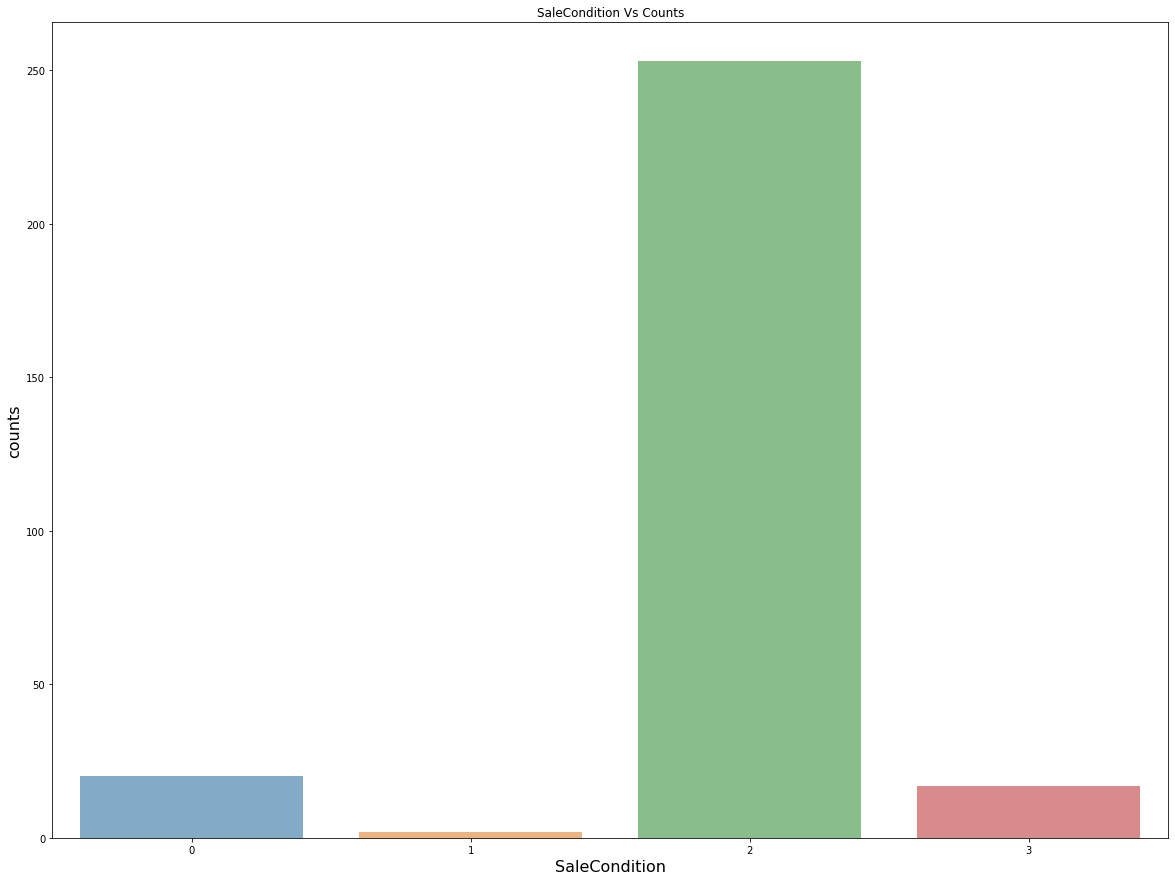

In [115]:
#Let's visualized it thorugh bargraph.

plt.figure(figsize=(20,15))
sns.barplot(data.index,data.values,alpha=0.6)
plt.xlabel('SaleCondition', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('SaleCondition Vs Counts')
plt.show()

BarGraph help to understand it better.

# Step No 3. Data description

In [116]:
df.describe()  #statstical summary

Id  MSSubClass    MSZoning  LotFrontage        LotArea  \
count   292.000000  292.000000  292.000000   292.000000     292.000000   
mean    755.955479   57.414384    2.136986    65.434932   10645.143836   
std     442.565228   43.780649    0.478114    20.110670   13330.669795   
min       6.000000   20.000000    0.000000    21.000000    1526.000000   
25%     377.750000   20.000000    2.000000    57.750000    7200.000000   
50%     778.000000   50.000000    2.000000    60.000000    9200.000000   
75%    1152.250000   70.000000    2.000000    76.000000   11658.750000   
max    1456.000000  190.000000    3.000000   150.000000  215245.000000   

           Street       Alley    LotShape  LandContour   Utilities  ...  \
count  292.000000  292.000000  292.000000   292.000000  292.000000  ...   
mean     0.993151    0.017123    1.958904     2.791096    0.003425  ...   
std      0.082618    0.129954    1.398953     0.699182    0.058521  ...   
min      0.000000    0.000000    0.000000     0.000000    0.000000  ...   
25%      1.000000    0.000000    0.000000     3.000000    0.000000  ...   
50%      1.000000    0.000000    3.000000     3.000000    0.000000  ...   
75%      1.000000    0.000000    3.000000     3.000000    0.000000  ...   
max      1.000000    1.000000    3.000000     3.000000    1.000000  ...   

        3SsnPorch  ScreenPorch  PoolArea       Fence  MiscFeature  \
count  292.000000   292.000000     292.0  292.000000   292.000000   
mean     2.489726    15.099315       0.0    1.924658     0.996575   
std     30.247488    58.483473       0.0    0.362989     0.058521   
min      0.000000     0.000000       0.0    0.000000     0.000000   
25%      0.000000     0.000000       0.0    2.000000     1.000000   
50%      0.000000     0.000000       0.0    2.000000     1.000000   
75%      0.000000     0.000000       0.0    2.000000     1.000000   
max    407.000000   396.000000       0.0    3.000000     1.000000   

           MiscVal      MoSold       YrSold    SaleType  SaleCondition  
count   292.000000  292.000000   292.000000  292.000000     292.000000  
mean     28.184932    6.232877  2007.859589    4.828767       1.914384  
std     224.036218    2.774556     1.322867    0.744829       0.576932  
min       0.000000    1.000000  2006.000000    0.000000       0.000000  
25%       0.000000    4.000000  2007.000000    5.000000       2.000000  
50%       0.000000    6.000000  2008.000000    5.000000       2.000000  
75%       0.000000    8.000000  2009.000000    5.000000       2.000000  
max    3500.000000   12.000000  2010.000000    5.000000       3.000000  

[8 rows x 79 columns]

Describe method gives stastical details like count, mean, std, min, max, 25%, 50%, 75%.
Above outcome shows, There are outiler present in dataset by comparing mean and 50% value. There is major difference between them like in  Id, MSSubClass, LotFrontage, LotArea	and other columns etc.  

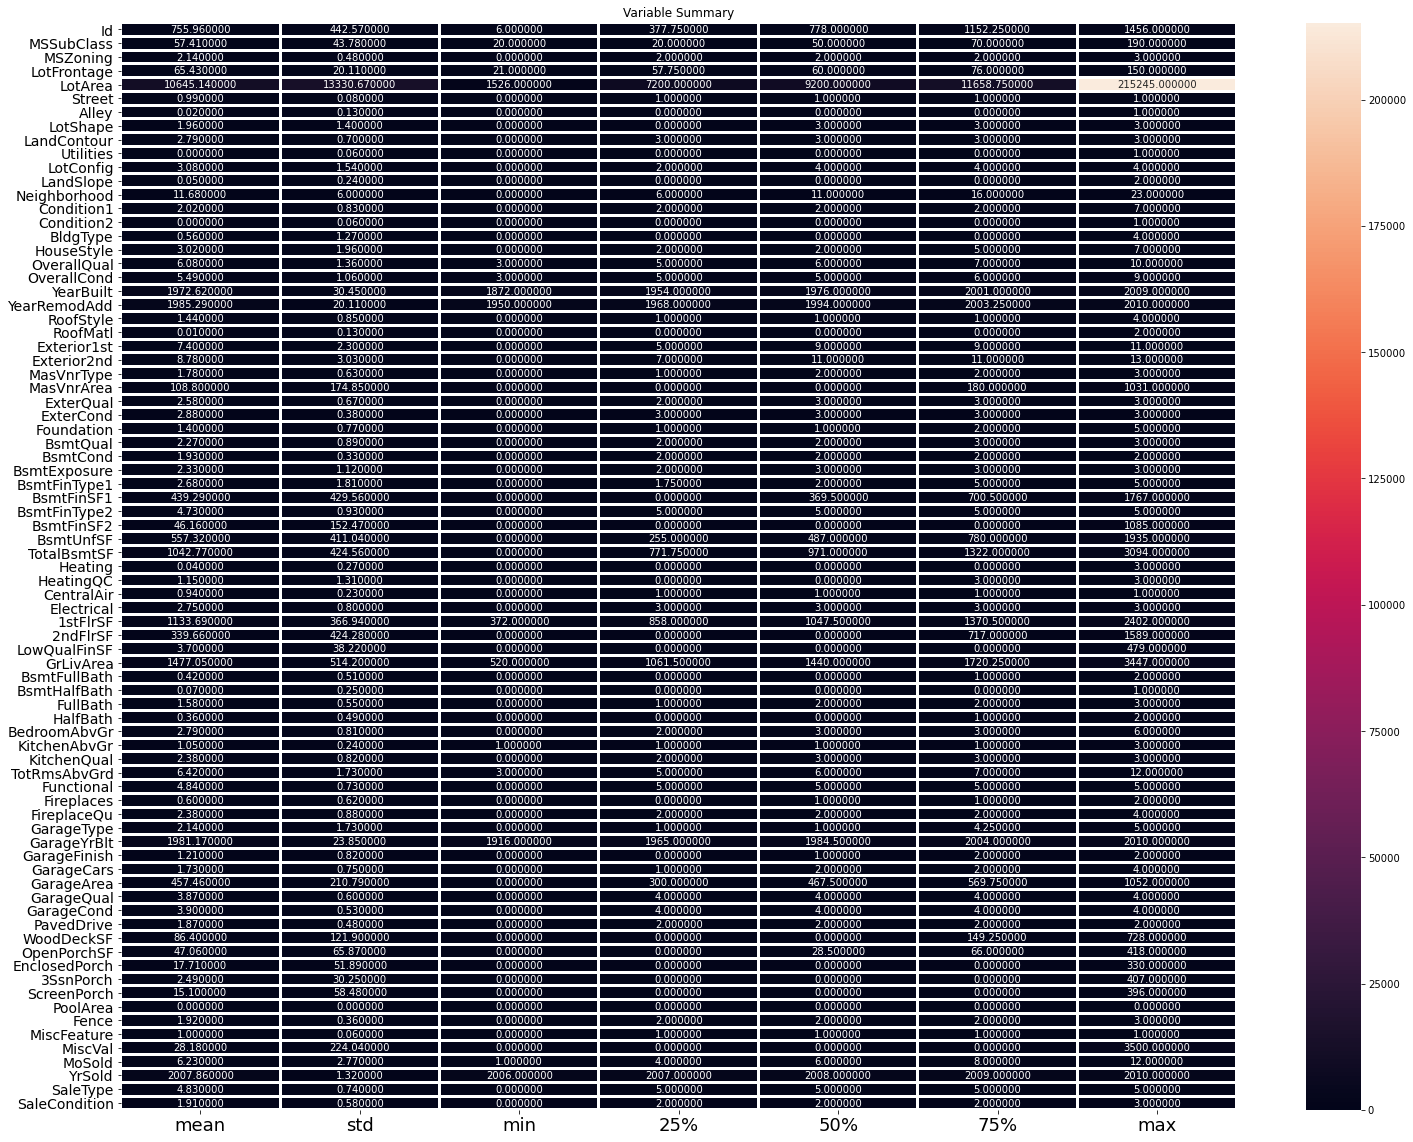

In [117]:
#lets visulized dataset

plt.figure(figsize=(25,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

Above outcome helps to understand relation between various varibales better.

In [118]:
corr_mat = df.corr() # Checking for correlation

In [119]:
corr_mat

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.035247 -0.087799    -0.021844 -0.045497   
MSSubClass     0.035247    1.000000  0.266517    -0.453905 -0.186654   
MSZoning      -0.087799    0.266517  1.000000    -0.323942 -0.117968   
LotFrontage   -0.021844   -0.453905 -0.323942     1.000000  0.362804   
LotArea       -0.045497   -0.186654 -0.117968     0.362804  1.000000   
Street         0.025743    0.004588 -0.063162    -0.060249 -0.069626   
Alley          0.041420    0.031969 -0.037882    -0.093587 -0.035848   
LotShape       0.066225    0.176681  0.167716    -0.105018 -0.110574   
LandContour   -0.018921    0.068736 -0.099137    -0.092496 -0.131482   
Utilities      0.025083   -0.050183 -0.016825    -0.015870  0.016430   
LotConfig      0.030673    0.071784  0.055261    -0.100452 -0.042599   
LandSlope      0.002456   -0.073979 -0.035312     0.159228  0.620079   
Neighborhood  -0.014366   -0.081962 -0.204984     0.187906  0.137189   
Condition1    -0.013734    0.042599 -0.059909     0.061393  0.010799   
Condition2    -0.096323   -0.036770  0.105995    -0.015870 -0.019035   
BldgType       0.002641    0.798007  0.230251    -0.435166 -0.190456   
HouseStyle     0.032030    0.455233 -0.068366    -0.096745 -0.015258   
OverallQual    0.005823   -0.116077 -0.276394     0.251875  0.109161   
OverallCond   -0.089945   -0.068113  0.191126    -0.102955 -0.071113   
YearBuilt     -0.000174    0.041932 -0.378803     0.134176  0.037757   
YearRemodAdd  -0.036955   -0.023317 -0.159359     0.055426 -0.022957   
RoofStyle      0.042134   -0.183492 -0.031210     0.205523  0.182766   
RoofMatl      -0.019185   -0.019367 -0.022604     0.080674  0.004290   
Exterior1st    0.007124   -0.103303 -0.028611     0.028626 -0.124700   
Exterior2nd   -0.033156   -0.202425 -0.028994     0.048000 -0.101138   
MasVnrType     0.005608   -0.092343  0.010358     0.084510 -0.016483   
MasVnrArea    -0.013197    0.004589 -0.106712     0.121932  0.062992   
ExterQual      0.028969    0.009859  0.245917    -0.245461 -0.060410   
ExterCond     -0.024688   -0.051525 -0.096395     0.076258  0.026250   
Foundation     0.059518    0.072808 -0.195382     0.120197  0.013464   
BsmtQual       0.073208    0.000375  0.138389    -0.138927 -0.041860   
BsmtCond      -0.062007   -0.015342 -0.111940     0.124218  0.021130   
BsmtExposure   0.006055   -0.049358  0.050552    -0.101782 -0.162388   
BsmtFinType1   0.025637    0.003453  0.038716     0.002689 -0.087270   
BsmtFinSF1    -0.040462   -0.142908 -0.153966     0.139330  0.209632   
BsmtFinType2   0.073628    0.043449 -0.015825    -0.113582 -0.030670   
BsmtFinSF2    -0.051283   -0.079328  0.012808     0.240924  0.277855   
BsmtUnfSF      0.041345   -0.169129 -0.123688     0.176875 -0.029717   
TotalBsmtSF   -0.019326   -0.336822 -0.270929     0.398734  0.283111   
Heating        0.043572    0.049709  0.094397     0.018770  0.179646   
HeatingQC     -0.012178    0.118102  0.228922    -0.121579  0.016198   
CentralAir     0.031490   -0.053192 -0.235065     0.019228  0.049270   
Electrical     0.033137    0.075568 -0.035888     0.008905  0.028097   
1stFlrSF       0.019726   -0.350270 -0.212694     0.461976  0.286714   
2ndFlrSF       0.144675    0.338926 -0.030786    -0.021781  0.030128   
LowQualFinSF   0.087688    0.012343  0.010704     0.206157  0.030371   
GrLivArea      0.139969    0.030615 -0.176389     0.327025  0.231721   
BsmtFullBath  -0.077773   -0.000676 -0.084559     0.082971  0.212162   
BsmtHalfBath   0.062190   -0.041577 -0.017534    -0.062427  0.020883   
FullBath       0.083174    0.095903 -0.236326     0.227977  0.141118   
HalfBath       0.146049    0.213601 -0.179885     0.021181  0.034980   
BedroomAbvGr   0.152676   -0.061750 -0.104881     0.228395  0.134990   
KitchenAbvGr   0.007486    0.275461  0.150506    -0.000379 -0.030264   
KitchenQual   -0.024404    0.093439  0.198917    -0.249778 -0.041457   
TotRmsAbvGrd   0.132171    0.002973 -0.123578     0.334902  0

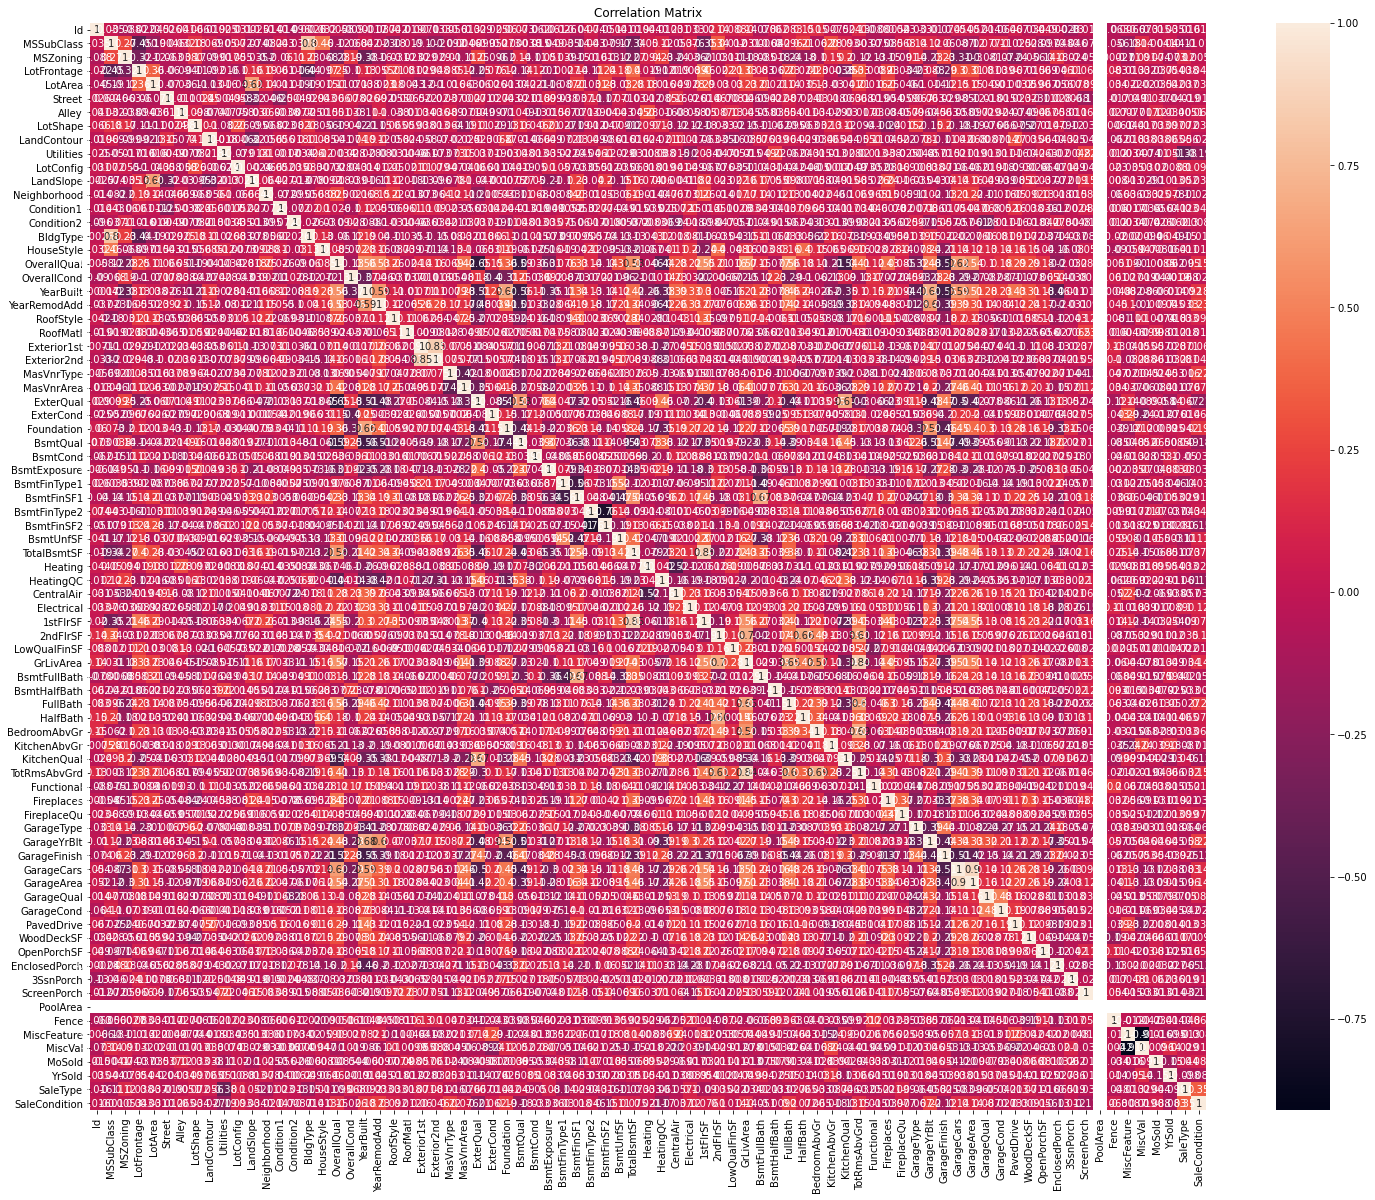

In [120]:
# visulization of correlated values.

plt.figure(figsize=(25,20))
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

All columns of database are positively correlated.

# Step 4. Data standarization and normalization

Id                 AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
MSSubClass       AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
MSZoning         AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
LotFrontage      AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
LotArea          AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Street           AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
Alley            AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
LotShape         AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
LandContour        AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
Utilities        AxesSubplot(0.223936,0.739237;0.0824468x0.0639...
LotConfig        AxesSubplot(0.322872,0.739237;0.0824468x0.0639...
LandSlope        AxesSubplot(0.421809,0.739237;0.0824468x0.0639...
Neighborhood     AxesSubplot(0.520745,0.739237;0.0824468x0.0639...
Condition1       AxesSubplot(0.619681,0.739237;0.0824468x0.0639...
Condition2       AxesSubplot(0.718617,0.739237;0.0824468x0.063

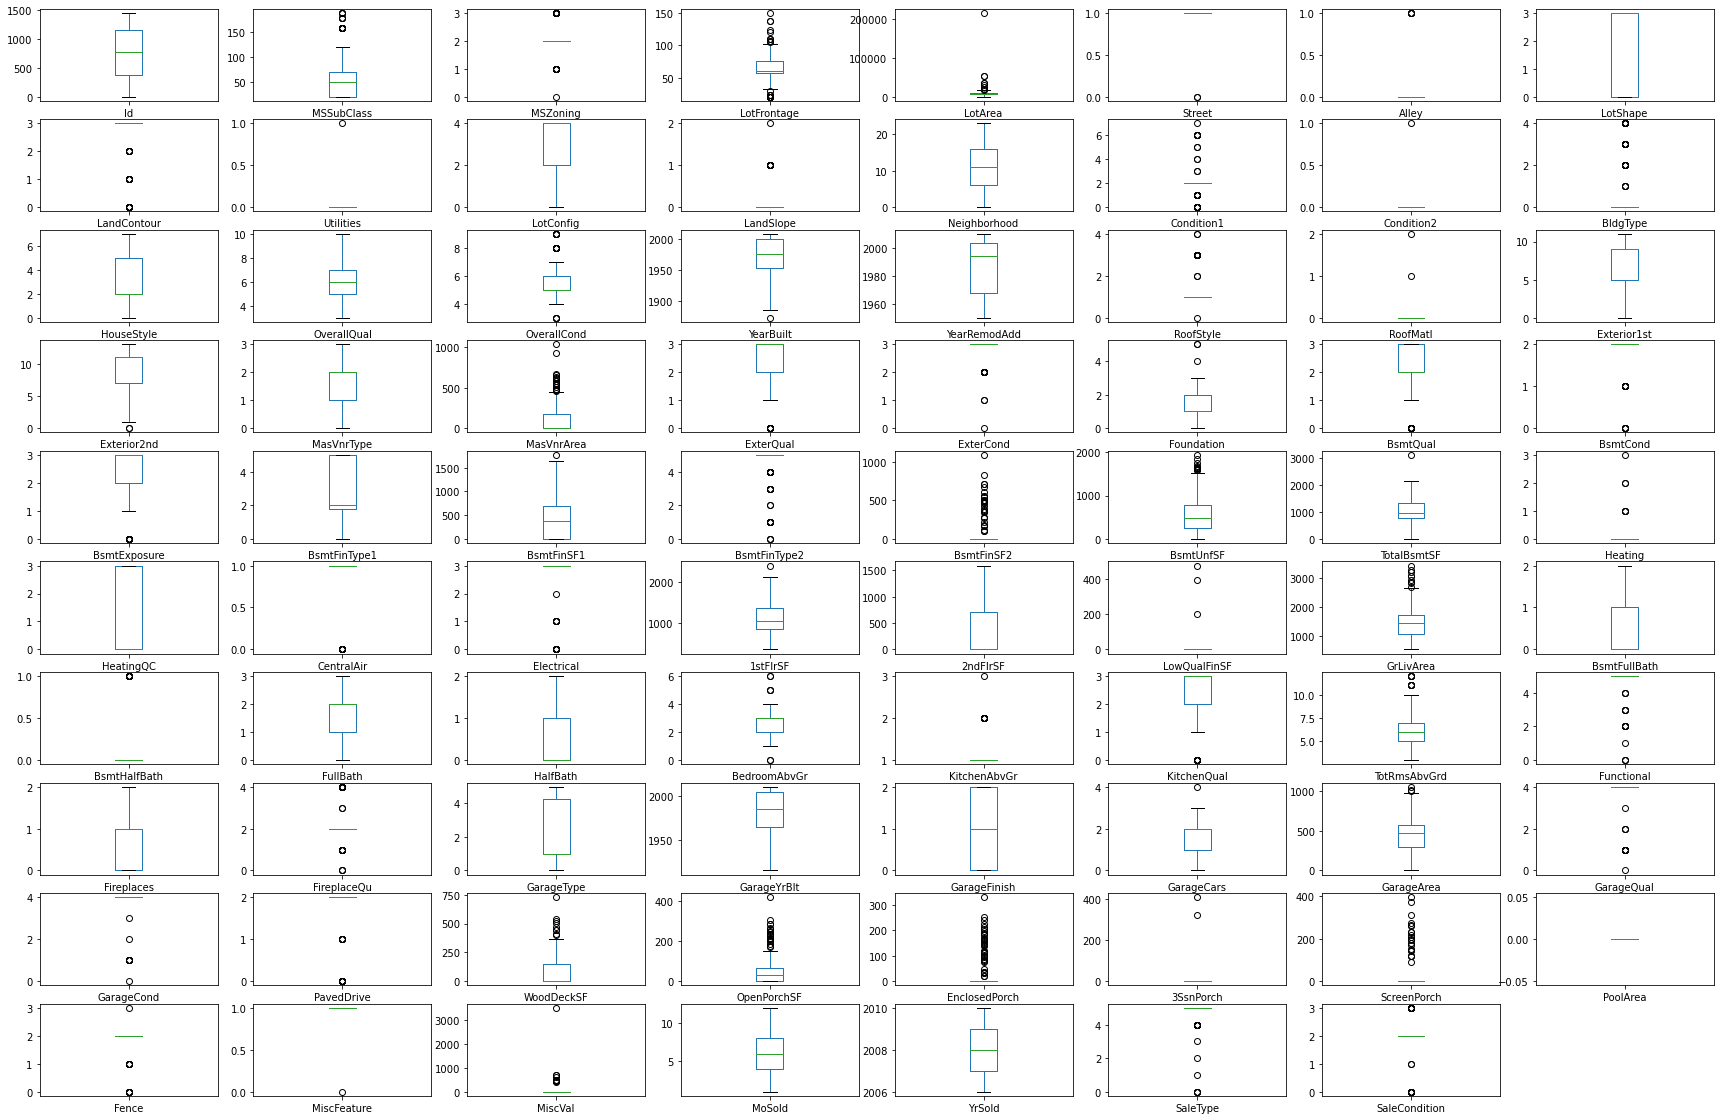

In [123]:
df.plot(kind='box',subplots =True, layout=(10,8),figsize=(30,20))

Above both outcome show outlier present in columns.

In [124]:
df.skew() #to check skewness

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.601264
LotArea          12.781805
Street          -12.020386
Alley             7.482782
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.978463
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1        0.739790
BsmtFinType2     -3.702330
BsmtFinSF2        3.698543
B

#Normalized data range has skewnees ranges between +0.5 to -0.5.

Columns has skewness - MSSubClass, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, BldgType, OverallCond,  YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, HalfBath, KitchenAbvGr, , TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, Fence, MiscFeature, MiscVal, SaleType and SaleCondition.       

Let's visualized skewness with help of distplot.

<AxesSubplot:xlabel='Id', ylabel='Density'>

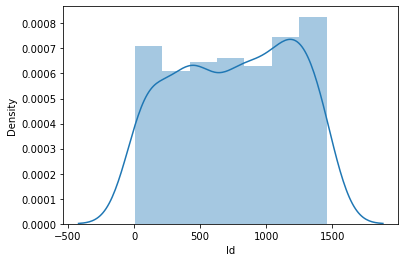

In [125]:
sns.distplot(df['Id'])

<AxesSubplot:xlabel='MSSubClass', ylabel='Density'>

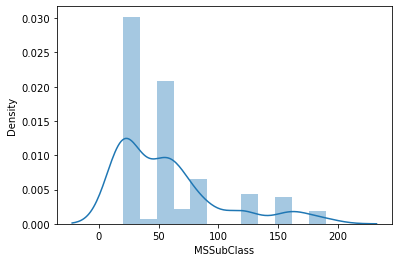

In [126]:
sns.distplot(df['MSSubClass'])

<AxesSubplot:xlabel='MSZoning', ylabel='Density'>

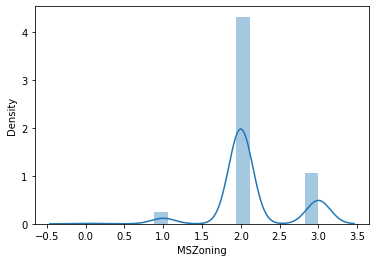

In [127]:
sns.distplot(df['MSZoning'])

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

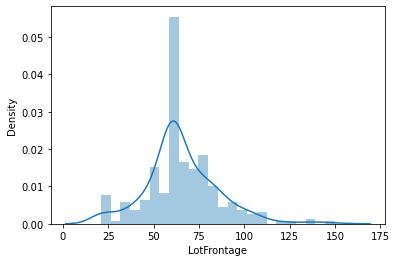

In [128]:
sns.distplot(df['LotFrontage'])

<AxesSubplot:xlabel='Street', ylabel='Density'>

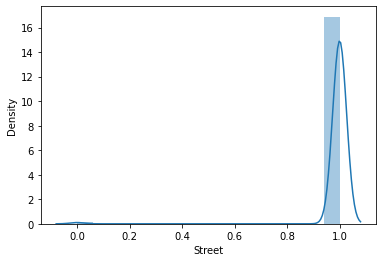

In [129]:
sns.distplot(df['Street'])

<AxesSubplot:xlabel='Alley', ylabel='Density'>

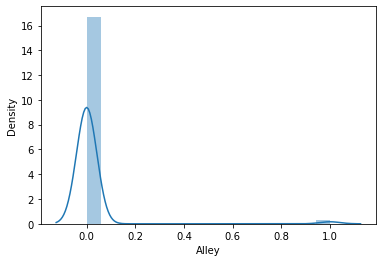

In [130]:
sns.distplot(df['Alley'])

<AxesSubplot:xlabel='LotShape', ylabel='Density'>

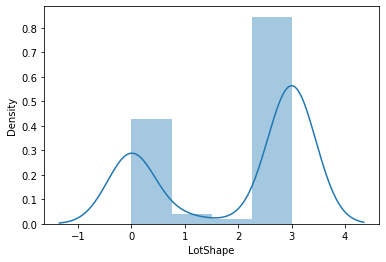

In [131]:
sns.distplot(df['LotShape'])

<AxesSubplot:xlabel='LandContour', ylabel='Density'>

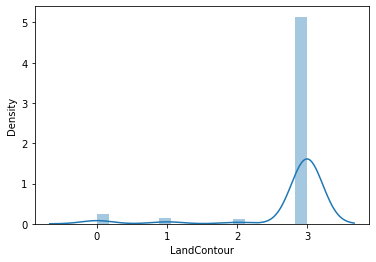

In [132]:
sns.distplot(df['LandContour'])

<AxesSubplot:xlabel='Utilities', ylabel='Density'>

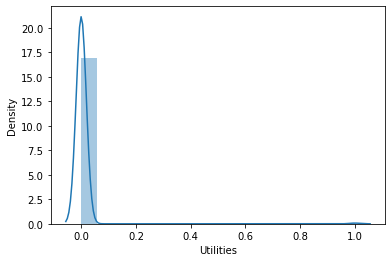

In [133]:
sns.distplot(df['Utilities'])

<AxesSubplot:xlabel='LotConfig', ylabel='Density'>

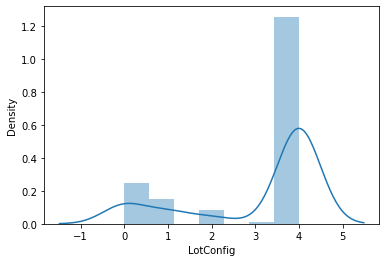

In [134]:
sns.distplot(df['LotConfig'])

<AxesSubplot:xlabel='LandSlope', ylabel='Density'>

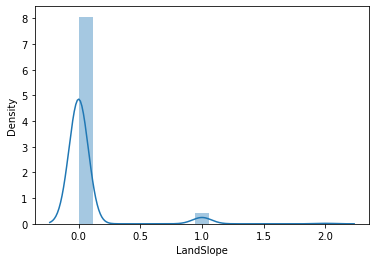

In [135]:
sns.distplot(df['LandSlope'])

<AxesSubplot:xlabel='Neighborhood', ylabel='Density'>

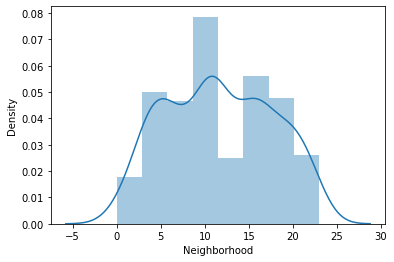

In [136]:
sns.distplot(df['Neighborhood'])

<AxesSubplot:xlabel='Condition1', ylabel='Density'>

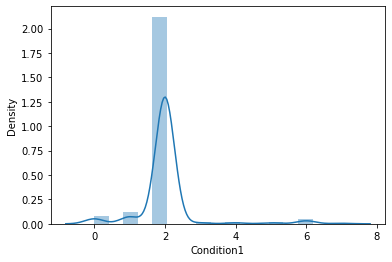

In [137]:
sns.distplot(df['Condition1'])

<AxesSubplot:xlabel='Condition2', ylabel='Density'>

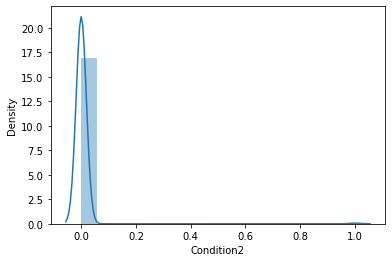

In [138]:
sns.distplot(df['Condition2'])

<AxesSubplot:xlabel='BldgType', ylabel='Density'>

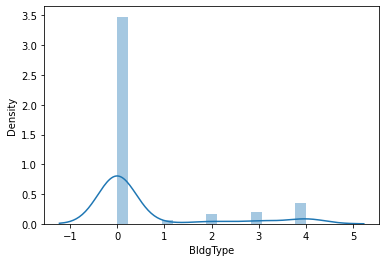

In [139]:
sns.distplot(df['BldgType'])

<AxesSubplot:xlabel='HouseStyle', ylabel='Density'>

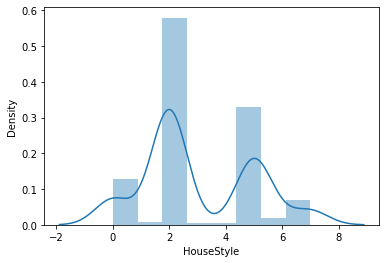

In [140]:
sns.distplot(df['HouseStyle'])

<AxesSubplot:xlabel='OverallQual', ylabel='Density'>

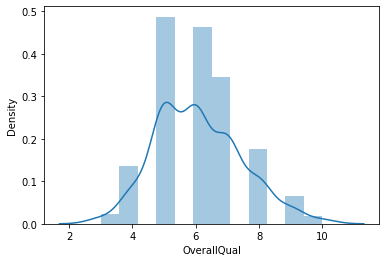

In [141]:
sns.distplot(df['OverallQual'])

<AxesSubplot:xlabel='OverallCond', ylabel='Density'>

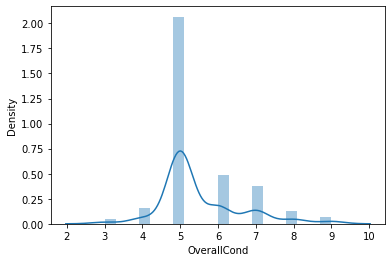

In [142]:
sns.distplot(df['OverallCond'])

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

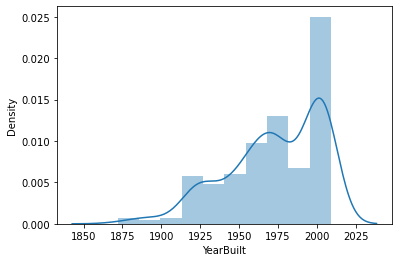

In [143]:
sns.distplot(df['YearBuilt'])

<AxesSubplot:xlabel='YearRemodAdd', ylabel='Density'>

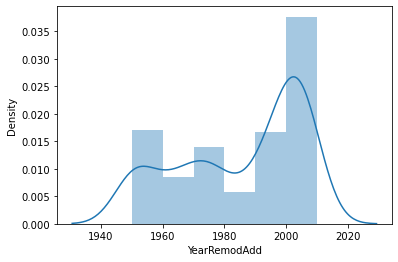

In [144]:
sns.distplot(df['YearRemodAdd'])

<AxesSubplot:xlabel='RoofStyle', ylabel='Density'>

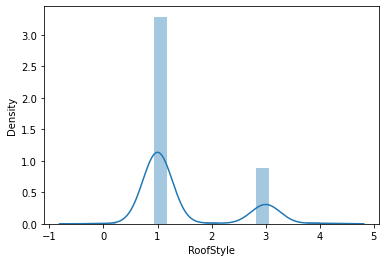

In [145]:
sns.distplot(df['RoofStyle'])

<AxesSubplot:xlabel='RoofMatl', ylabel='Density'>

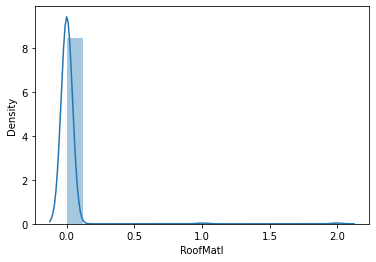

In [146]:
sns.distplot(df['RoofMatl'])

<AxesSubplot:xlabel='Exterior1st', ylabel='Density'>

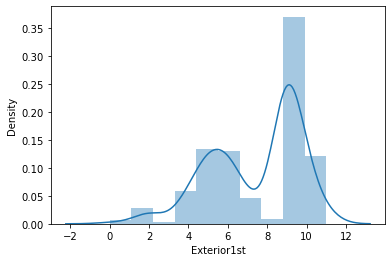

In [147]:
sns.distplot(df['Exterior1st'])

<AxesSubplot:xlabel='Exterior2nd', ylabel='Density'>

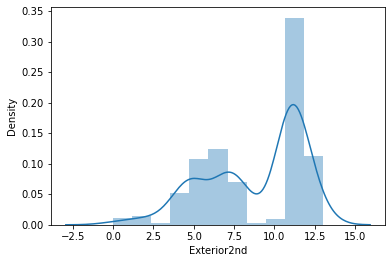

In [148]:
sns.distplot(df['Exterior2nd'])

<AxesSubplot:xlabel='MasVnrType', ylabel='Density'>

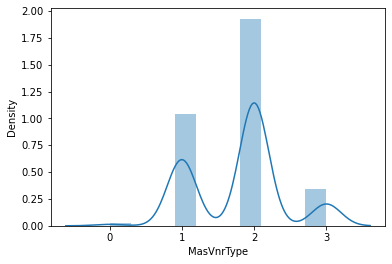

In [149]:
sns.distplot(df['MasVnrType'])

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

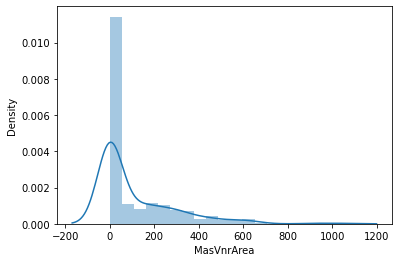

In [150]:
sns.distplot(df['MasVnrArea'])

<AxesSubplot:xlabel='ExterQual', ylabel='Density'>

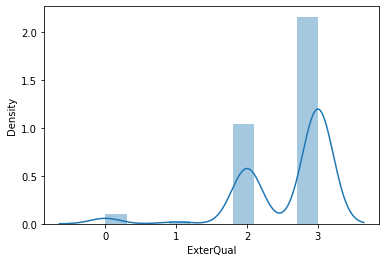

In [151]:
sns.distplot(df['ExterQual'])

<AxesSubplot:xlabel='ExterCond', ylabel='Density'>

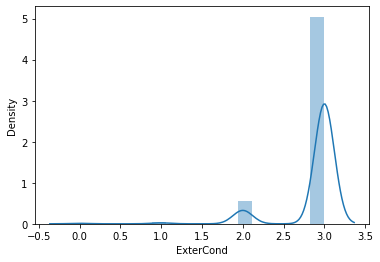

In [152]:
sns.distplot(df['ExterCond'])

<AxesSubplot:xlabel='Foundation', ylabel='Density'>

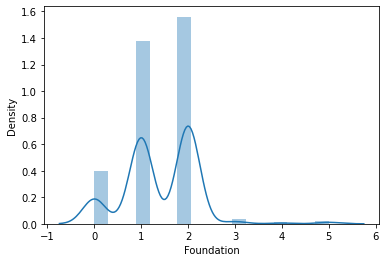

In [153]:
sns.distplot(df['Foundation'])

<AxesSubplot:xlabel='BsmtQual', ylabel='Density'>

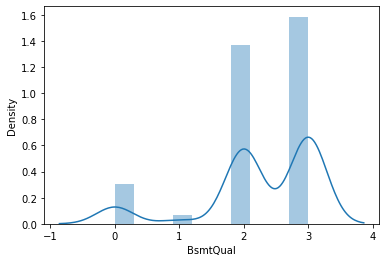

In [154]:
sns.distplot(df['BsmtQual'])

<AxesSubplot:xlabel='BsmtCond', ylabel='Density'>

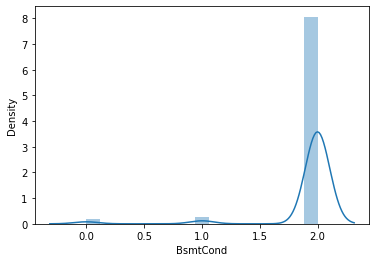

In [155]:
sns.distplot(df['BsmtCond'])

<AxesSubplot:xlabel='BsmtExposure', ylabel='Density'>

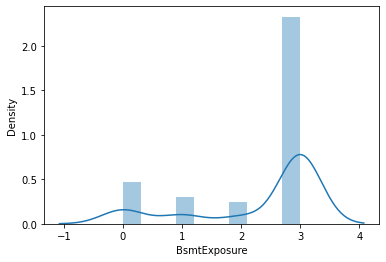

In [156]:
sns.distplot(df['BsmtExposure'])

<AxesSubplot:xlabel='BsmtFinType1', ylabel='Density'>

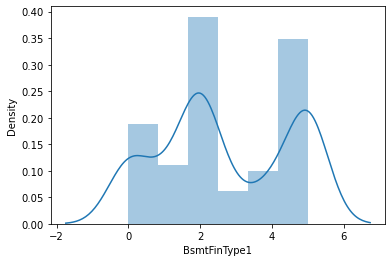

In [157]:
sns.distplot(df['BsmtFinType1'])

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='Density'>

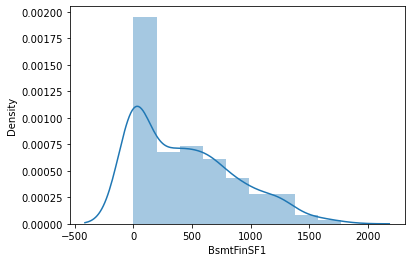

In [158]:
sns.distplot(df['BsmtFinSF1'])

<AxesSubplot:xlabel='BsmtFinType2', ylabel='Density'>

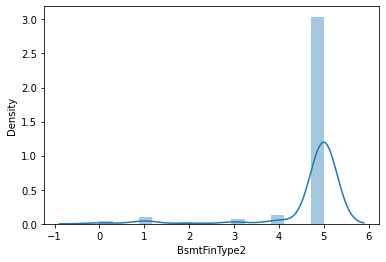

In [159]:
sns.distplot(df['BsmtFinType2'])

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='Density'>

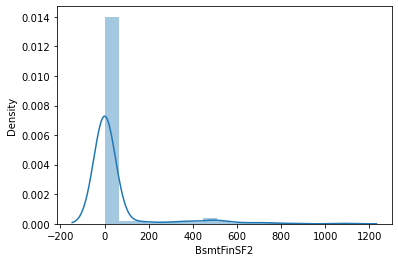

In [160]:
sns.distplot(df['BsmtFinSF2'])

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='Density'>

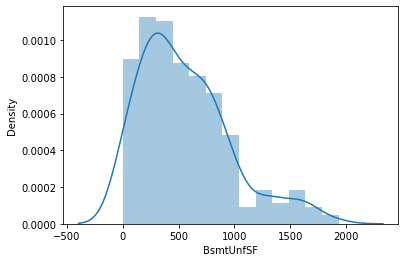

In [161]:
sns.distplot(df['BsmtUnfSF'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

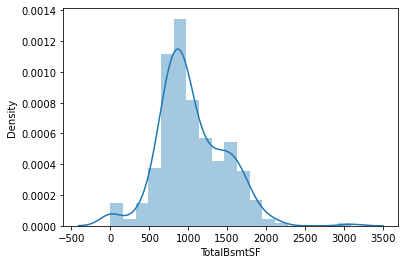

In [162]:
sns.distplot(df['TotalBsmtSF'])

<AxesSubplot:xlabel='Heating', ylabel='Density'>

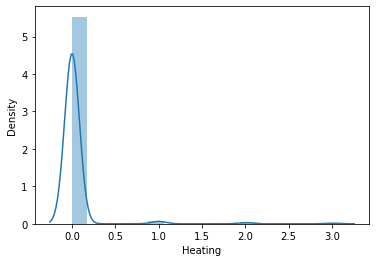

In [163]:
sns.distplot(df['Heating'])

<AxesSubplot:xlabel='HeatingQC', ylabel='Density'>

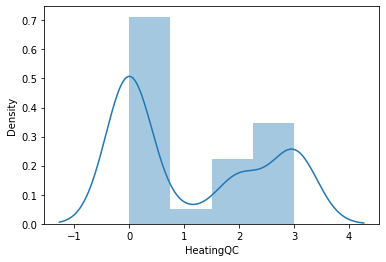

In [164]:
sns.distplot(df['HeatingQC'])

<AxesSubplot:xlabel='CentralAir', ylabel='Density'>

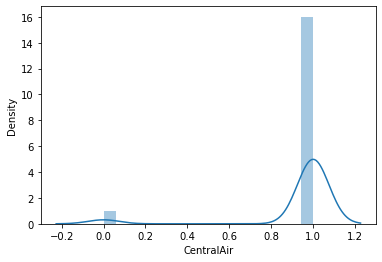

In [165]:
sns.distplot(df['CentralAir'])

<AxesSubplot:xlabel='Electrical', ylabel='Density'>

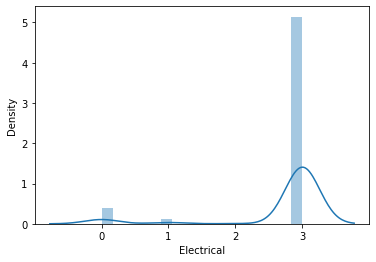

In [166]:
sns.distplot(df['Electrical'])

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

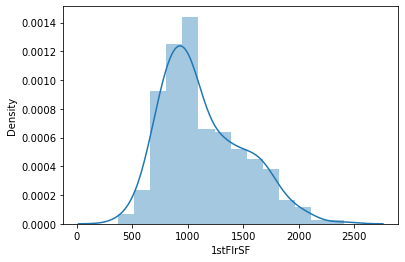

In [167]:
sns.distplot(df['1stFlrSF'])

<AxesSubplot:xlabel='2ndFlrSF', ylabel='Density'>

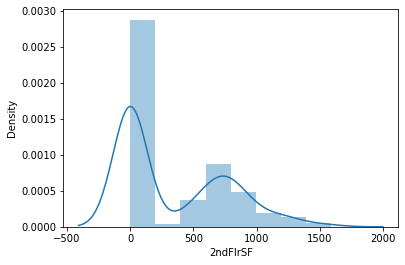

In [168]:
sns.distplot(df['2ndFlrSF'])

<AxesSubplot:xlabel='LowQualFinSF', ylabel='Density'>

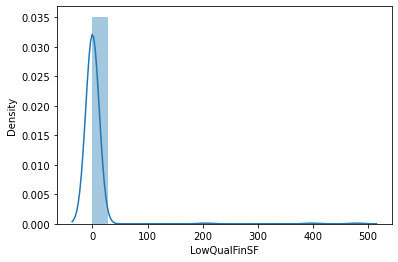

In [169]:
sns.distplot(df['LowQualFinSF'])

<AxesSubplot:xlabel='GrLivArea', ylabel='Density'>

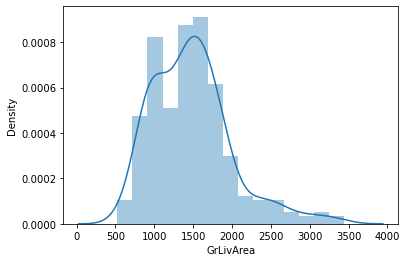

In [170]:
sns.distplot(df['GrLivArea'])

<AxesSubplot:xlabel='BsmtFullBath', ylabel='Density'>

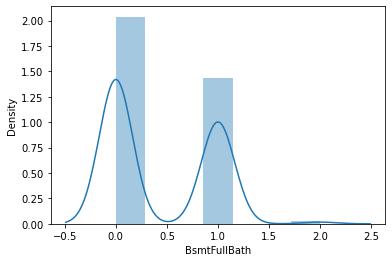

In [171]:
sns.distplot(df['BsmtFullBath'])

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='Density'>

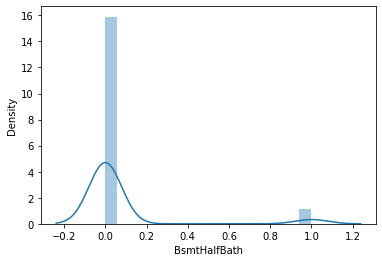

In [172]:
sns.distplot(df['BsmtHalfBath'])

<AxesSubplot:xlabel='FullBath', ylabel='Density'>

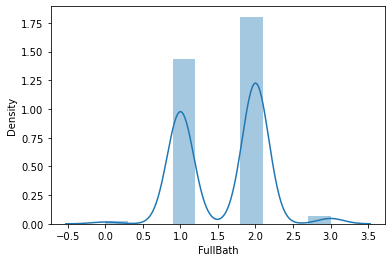

In [173]:
sns.distplot(df['FullBath'])

<AxesSubplot:xlabel='HalfBath', ylabel='Density'>

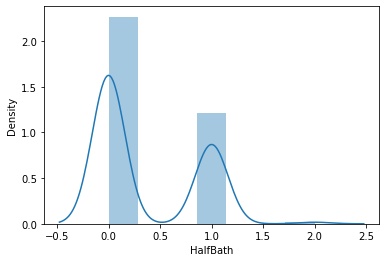

In [174]:
sns.distplot(df['HalfBath'])

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='Density'>

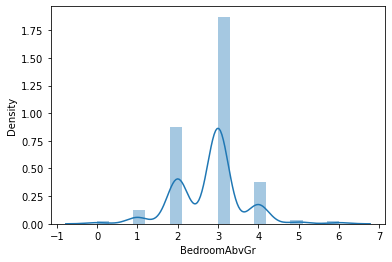

In [175]:
sns.distplot(df['BedroomAbvGr'])

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='Density'>

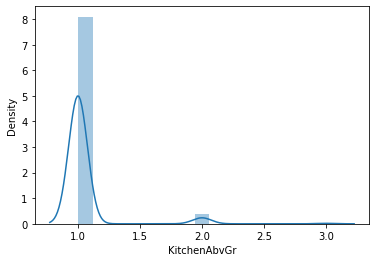

In [176]:
sns.distplot(df['KitchenAbvGr'])

<AxesSubplot:xlabel='KitchenQual', ylabel='Density'>

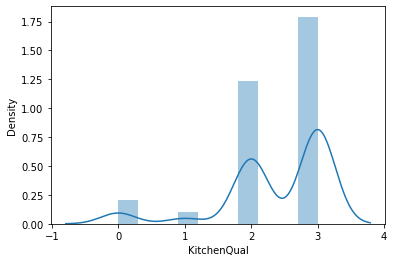

In [177]:
sns.distplot(df['KitchenQual'])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Density'>

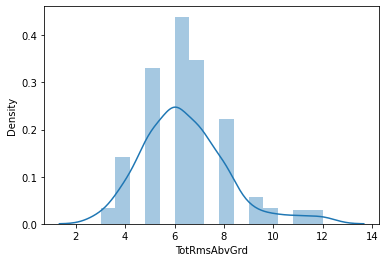

In [178]:
sns.distplot(df['TotRmsAbvGrd'])

<AxesSubplot:xlabel='Functional', ylabel='Density'>

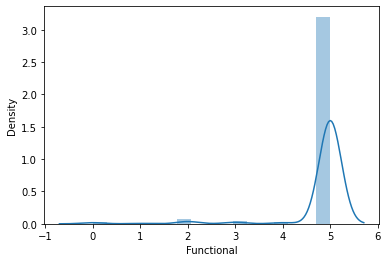

In [179]:
sns.distplot(df['Functional'])

<AxesSubplot:xlabel='Fireplaces', ylabel='Density'>

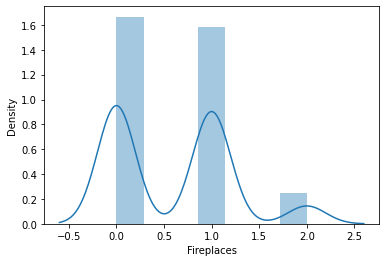

In [180]:
sns.distplot(df['Fireplaces'])

<AxesSubplot:xlabel='FireplaceQu', ylabel='Density'>

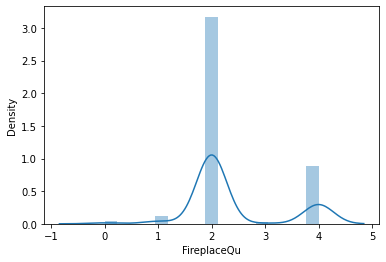

In [181]:
sns.distplot(df['FireplaceQu'])

<AxesSubplot:xlabel='GarageType', ylabel='Density'>

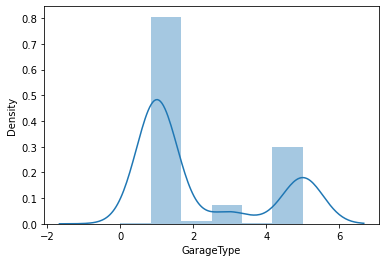

In [182]:
sns.distplot(df['GarageType'])

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

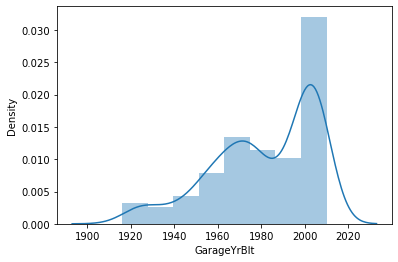

In [183]:
sns.distplot(df['GarageYrBlt'])

<AxesSubplot:xlabel='GarageFinish', ylabel='Density'>

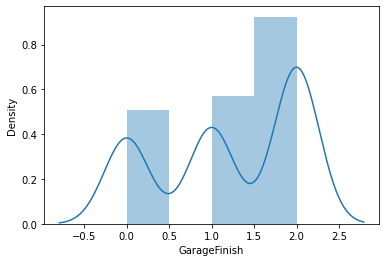

In [184]:
sns.distplot(df['GarageFinish'])

<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

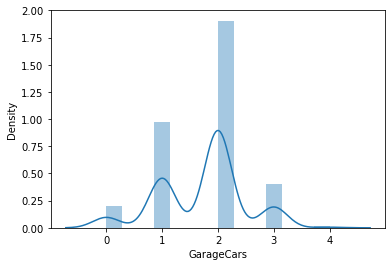

In [185]:
sns.distplot(df['GarageCars'])

<AxesSubplot:xlabel='GarageArea', ylabel='Density'>

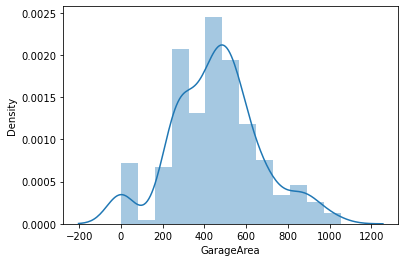

In [186]:
sns.distplot(df['GarageArea'])

<AxesSubplot:xlabel='GarageQual', ylabel='Density'>

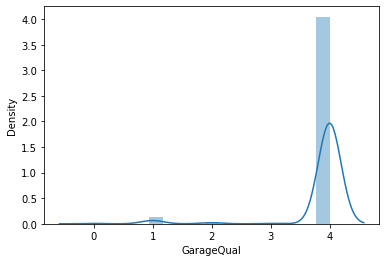

In [187]:
sns.distplot(df['GarageQual'])

<AxesSubplot:xlabel='GarageCond', ylabel='Density'>

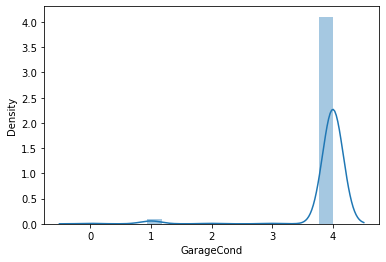

In [188]:
sns.distplot(df['GarageCond'])

<AxesSubplot:xlabel='PavedDrive', ylabel='Density'>

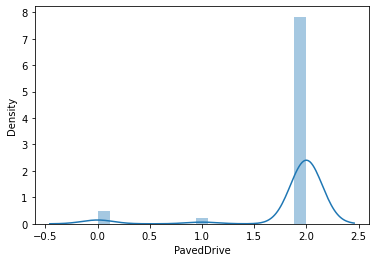

In [189]:
sns.distplot(df['PavedDrive'])

<AxesSubplot:xlabel='WoodDeckSF', ylabel='Density'>

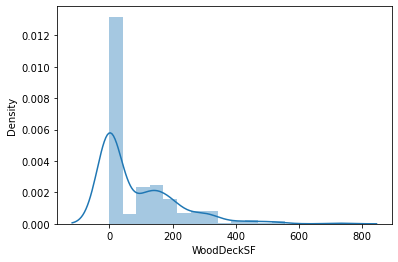

In [190]:
sns.distplot(df['WoodDeckSF'])

<AxesSubplot:xlabel='OpenPorchSF', ylabel='Density'>

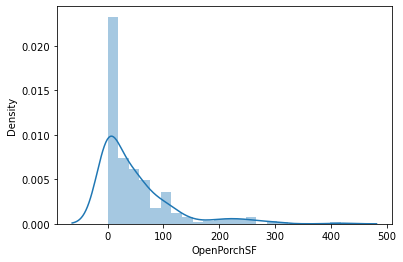

In [191]:
sns.distplot(df['OpenPorchSF'])

<AxesSubplot:xlabel='EnclosedPorch', ylabel='Density'>

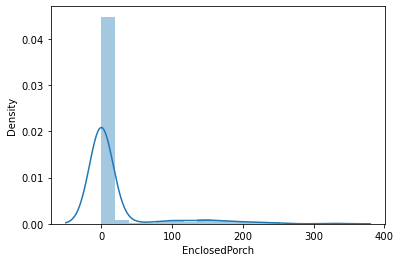

In [192]:
sns.distplot(df['EnclosedPorch'])

<AxesSubplot:xlabel='3SsnPorch', ylabel='Density'>

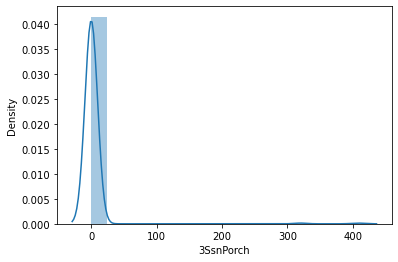

In [193]:
sns.distplot(df['3SsnPorch'])

<AxesSubplot:xlabel='ScreenPorch', ylabel='Density'>

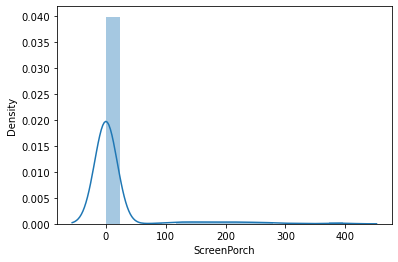

In [194]:
sns.distplot(df['ScreenPorch'])

<AxesSubplot:xlabel='PoolArea', ylabel='Density'>

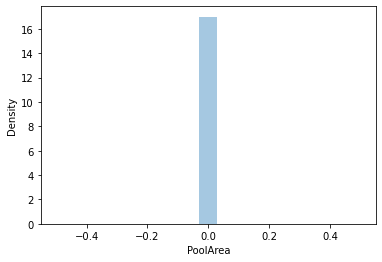

In [195]:
sns.distplot(df['PoolArea'])

<AxesSubplot:xlabel='Fence', ylabel='Density'>

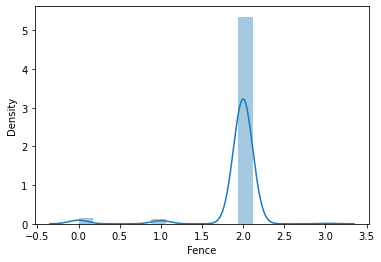

In [196]:
sns.distplot(df['Fence'])

<AxesSubplot:xlabel='MiscFeature', ylabel='Density'>

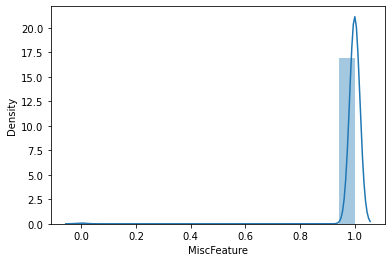

In [197]:
sns.distplot(df['MiscFeature'])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

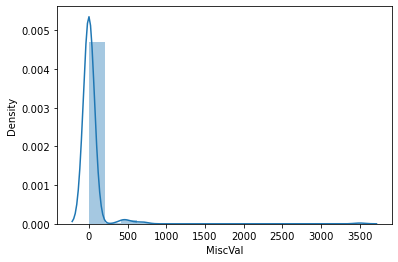

In [198]:
sns.distplot(df['MiscVal'])

<AxesSubplot:xlabel='MoSold', ylabel='Density'>

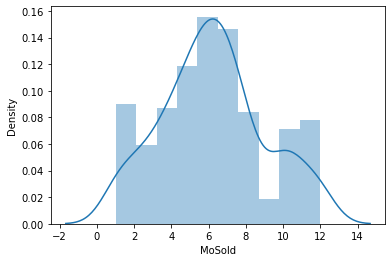

In [199]:
sns.distplot(df['MoSold'])

<AxesSubplot:xlabel='YrSold', ylabel='Density'>

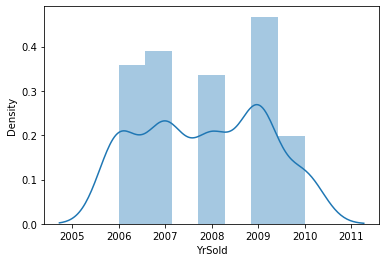

In [200]:
sns.distplot(df['YrSold'])

<AxesSubplot:xlabel='SaleType', ylabel='Density'>

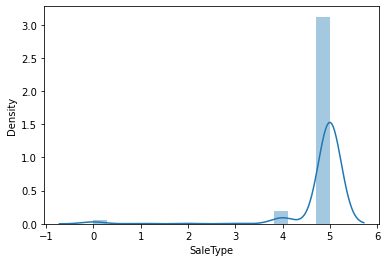

In [201]:
sns.distplot(df['SaleType'])

<AxesSubplot:xlabel='SaleCondition', ylabel='Density'>

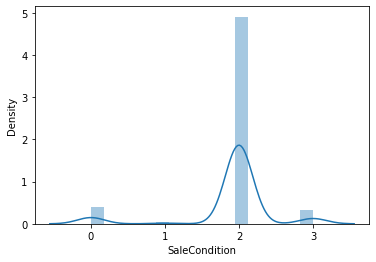

In [202]:
sns.distplot(df['SaleCondition'])

Removing skewness from dataset with help of zscore.

In [203]:
from scipy.stats import zscore 
from scipy import stats    #Importing requried library.
z = np.abs(stats.zscore(df))
z.shape

(292, 79)

In [204]:
index = (np.where(z>7)[0])
df = df.drop(df.index[index])
df.shape

(270, 79)

After applying zscore method, We got new dataset with 270 rows and 79 columns.

In [205]:
loss_percent=(292-270)/292*100
print(loss_percent) 

7.534246575342466


After removing skewness - total data lost is 07.534%.

# Step 5. Creation of train and test data sets using optimum parameters

In [206]:
#splitting dataset into x and y.

y = df['SaleCondition']
x = df.drop(columns=['SaleCondition'])

In [207]:
x.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   337          20         2         86.0    14157       1      0         0   
1  1018         120         2         60.0     5814       1      0         0   
2   929          20         2         60.0    11838       1      0         3   
3  1148          70         2         75.0    12000       1      0         3   
4  1227          60         2         86.0    14598       1      0         0   

   LandContour  Utilities  ...  EnclosedPorch  3SsnPorch  ScreenPorch  \
0            1          0  ...              0          0            0   
1            3          0  ...              0          0            0   
2            3          0  ...              0          0            0   
3            0          0  ...              0          0            0   
4            3          0  ...              0          0            0   

   PoolArea  Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  
0         0      2            1        0       7    2007         5  
1         0      2            1        0       8    2009         0  
2         0      2            1        0       6    2009         5  
3         0      2            1        0       7    2009         5  
4         0      2            1        0       1    2008         5  

[5 rows x 78 columns]

In [208]:
y.head()

0    2
1    0
2    2
3    2
4    2
Name: SaleCondition, dtype: int32

In [209]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled 

array([[-0.97572302, -0.87069535, -0.2847474 , ...,  0.29903797,
        -0.60683049,  0.22427187],
       [ 0.58830208,  1.50033585, -0.2847474 , ...,  0.65948552,
         0.8963276 , -6.81682161],
       [ 0.38389939, -0.87069535, -0.2847474 , ..., -0.06140958,
         0.8963276 ,  0.22427187],
       ...,
       [-1.71065405, -0.87069535, -0.2847474 , ..., -1.14275224,
         1.64790665,  0.22427187],
       [-0.54854436, -0.15938599,  1.85085809, ...,  1.38038063,
        -1.35840954,  0.22427187],
       [ 1.41739615,  2.44874833,  1.85085809, ..., -0.06140958,
        -1.35840954,  0.22427187]])

In [210]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)

# Step 6. Model training using ML algorithm

Model No. 1 Logistic Regression

In [211]:
# Model instatiating and training

from sklearn.linear_model import LogisticRegression #Importing required lib.
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)

print(accuracy_score(y_test,predlr))

print(confusion_matrix(y_test,predlr))

print(classification_report(y_test,predlr))

0.8676470588235294
[[ 0  0  2  1]
 [ 0  0  1  0]
 [ 1  0 57  0]
 [ 1  0  3  2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.90      0.98      0.94        58
           3       0.67      0.33      0.44         6

    accuracy                           0.87        68
   macro avg       0.39      0.33      0.35        68
weighted avg       0.83      0.87      0.84        68



Model No. 2 KNeighborsClassifier

In [212]:
from sklearn.neighbors import KNeighborsClassifier   #Importing requried lib.
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
predknn = KNN.predict(x_test)

print(accuracy_score(y_test,predknn))

print(confusion_matrix(y_test,predknn))

print(classification_report(y_test,predknn))

0.8529411764705882
[[ 0  0  3  0]
 [ 0  0  1  0]
 [ 0  0 58  0]
 [ 0  0  6  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.85      1.00      0.92        58
           3       0.00      0.00      0.00         6

    accuracy                           0.85        68
   macro avg       0.21      0.25      0.23        68
weighted avg       0.73      0.85      0.79        68



Model No. 3 RandomForestClassifier

In [213]:
from sklearn.ensemble import RandomForestClassifier     # Importing required lib
RAN = RandomForestClassifier()
RAN.fit(x_train,y_train)
predran = RAN.predict(x_test)

print(accuracy_score(y_test,predran))

print(confusion_matrix(y_test,predran))

print(classification_report(y_test,predran))

0.9264705882352942
[[ 0  0  3  0]
 [ 0  0  1  0]
 [ 0  0 58  0]
 [ 0  0  1  5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.92      1.00      0.96        58
           3       1.00      0.83      0.91         6

    accuracy                           0.93        68
   macro avg       0.48      0.46      0.47        68
weighted avg       0.87      0.93      0.90        68



Model No. 4 DecisionTreeClassifier

In [214]:
from sklearn.tree import DecisionTreeClassifier    #Importing requried lib.
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test,preddt))

print(confusion_matrix(y_test,preddt))

print(classification_report(y_test,preddt))

0.8970588235294118
[[ 1  0  2  0]
 [ 0  0  1  0]
 [ 3  0 55  0]
 [ 1  0  0  5]]
              precision    recall  f1-score   support

           0       0.20      0.33      0.25         3
           1       0.00      0.00      0.00         1
           2       0.95      0.95      0.95        58
           3       1.00      0.83      0.91         6

    accuracy                           0.90        68
   macro avg       0.54      0.53      0.53        68
weighted avg       0.91      0.90      0.90        68



In [215]:
from sklearn.model_selection import cross_val_score  #Importing requried lob.

In [216]:
scr = cross_val_score(LR,x,y,cv=3)
print('Cross validation score for Logistic Regression :',scr.mean())

Cross validation score for Logistic Regression : 0.8407407407407407


In [217]:
scr = cross_val_score(dt,x,y,cv=3)
print('Cross validation score for Decision Tree Classifer:',scr.mean())

Cross validation score for Decision Tree Classifer: 0.8888888888888888


In [218]:
scr = cross_val_score(KNN,x,y,cv=3)
print('Cross validation score for KNN :',scr.mean())

Cross validation score for KNN : 0.8555555555555555


In [219]:
scr = cross_val_score(RAN,x,y,cv=3)
print('Cross validation score for Random Forest Classifer :',scr.mean())

Cross validation score for Random Forest Classifer : 0.9


# 

# Step No 7. Hyper parameter tuning

In [220]:
from sklearn.model_selection import GridSearchCV    #Importing requried lib.

In [221]:
parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}

In [222]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=2)

In [223]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [200]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [224]:
mod = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=5, n_estimators=200)

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

86.76470588235294


# Step No. 8 Saving Model

In [225]:
import joblib  #importing requried lib.
joblib.dump(mod,"HousingPricePredictionProject.pkl")

['HousingPricePredictionProject.pkl']